Significance:

$$Z = \frac{S}{\sqrt{S+B}}$$

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

In [2]:
# Signal
nMassPoints = 2
cases = ["gSq_only","gSg1_only", "gSg2_only_y0y0", "gSg_only"]
data = {}
for i in cases:
    csvFile = [f"./sim_outputs/csv/DM_{i}_{j}.csv" for j in range(nMassPoints)]
    data[i] = [pd.read_csv(j) for j in csvFile]

In [3]:
print("Número de Eventos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])

Número de Eventos:  [[50000, 50000], [50000, 50000], [50000, 50000], [50000, 50000]]


In [4]:
data['gSq_only'][1]

Unnamed: 0     jet_pt0    jet_pt1     jet_pt2     jet_pt3  jet_eta0  \
0               0   756.66220  742.71094   36.203380   29.334707  0.439713   
1               1   944.47730  936.52500  105.328420   27.055773  0.481779   
2               2   864.63340  470.71120  245.757110   95.468500  0.226472   
3               3  1013.30980  979.12714   46.633904   25.706217 -0.563679   
4               4   941.70830  923.15730  478.710660  234.780140 -0.679420   
...           ...         ...        ...         ...         ...       ...   
49995       49995   647.19960  611.05650   37.804550   14.892321  1.104574   
49996       49996   649.81586  326.10983  199.701950   74.261200  1.269007   
49997       49997  1023.78625  999.49020  198.582550   34.962320  0.303368   
49998       49998   853.12360  701.48376  350.468700   88.252910  0.408511   
49999       49999   365.86070  345.27606  161.966520  132.456830 -1.343507   

       jet_eta1  jet_eta2  jet_eta3  jet_phi0  ...  jet_tautag1  jet_tautag2  \
0     -1.108317  1.494798 -3.276902  0.040188  ...          0.0          0.0   
1     -0.036787 -1.282798 -0.053198 -2.171466  ...          0.0          0.0   
2     -1.640522 -0.245020 -0.249850  2.565546  ...          0.0          0.0   
3     -0.475223  4.031762 -1.198646 -1.210001  ...          0.0          0.0   
4     -1.361673  2.432674  0.746062  1.569149  ...          0.0          0.0   
...         ...       ...       ...       ...  ...          ...          ...   
49995 -0.952314  2.169049  4.736329 -0.614671  ...          0.0          0.0   
49996 -1.557590  0.614295  0.094764 -1.085621  ...          0.0          0.0   
49997  0.055208 -0.567880  2.389710 -1.334522  ...          0.0          0.0   
49998 -1.184784 -1.572881  1.083601 -0.928853  ...          0.0          0.0   
49999  2.088351 -0.303100 -0.269037 -1.490027  ...          0.0          0.0   

       jet_tautag3  missinget_met  missinget_phi  Delta_phi  Delta_rapidity  \
0              0.0       4.928024       2.793944   3.128401        1.548030   
1              0.0      71.838326       2.689381   2.994146        0.518566   
2              0.0      14.163344       0.853642   2.979551        1.866995   
3              0.0      18.508640       2.178016   3.104459        0.088456   
4              0.0      29.989851       0.692574   2.740622        0.682252   
...            ...            ...            ...        ...             ...   
49995          0.0      10.873524       2.739809   3.121074        2.056888   
49996          0.0      12.560968      -1.099233   2.883509        2.826598   
49997          0.0      23.364595       1.632135   2.872641        0.248160   
49998          0.0     153.470700       1.180174   2.473039        1.593294   
49999          0.0      25.571478      -1.674737   2.842601        3.431858   

          Inv_mass  Rapidity_prod  Hadronic_energy  
0      3177.539370      -0.487341      1564.911227  
1      3961.627210      -0.017723      2013.386493  
2      2309.588802      -0.371533      1676.570210  
3      4491.629396       0.267873      2064.777061  
4      3371.754602       0.925148      2578.356400  
...            ...            ...              ...  
49995  2416.474845      -1.051901      1310.952971  
49996   457.037840      -1.976594      1249.888840  
49997  4005.376964       0.016748      2256.821320  
49998  2020.196310      -0.483997      1993.328970  
49999  1317.823503      -2.805714      1005.560110  

[50000 rows x 32 columns]

In [5]:
for i in cases:
    for j in range(2):
        data[i][j] = construct_variables_all(data[i][j])

In [6]:
data['gSq_only'][1]

Unnamed: 0     jet_pt0    jet_pt1     jet_pt2     jet_pt3  jet_eta0  \
0               0   756.66220  742.71094   36.203380   29.334707  0.439713   
1               1   944.47730  936.52500  105.328420   27.055773  0.481779   
2               2   864.63340  470.71120  245.757110   95.468500  0.226472   
3               3  1013.30980  979.12714   46.633904   25.706217 -0.563679   
4               4   941.70830  923.15730  478.710660  234.780140 -0.679420   
...           ...         ...        ...         ...         ...       ...   
49995       49995   647.19960  611.05650   37.804550   14.892321  1.104574   
49996       49996   649.81586  326.10983  199.701950   74.261200  1.269007   
49997       49997  1023.78625  999.49020  198.582550   34.962320  0.303368   
49998       49998   853.12360  701.48376  350.468700   88.252910  0.408511   
49999       49999   365.86070  345.27606  161.966520  132.456830 -1.343507   

       jet_eta1  jet_eta2  jet_eta3  jet_phi0  ...  Inv_mass_12  Inv_mass_03  \
0     -1.108317  1.494798 -3.276902  0.040188  ...   695.047492   631.497895   
1     -0.036787 -1.282798 -0.053198 -2.171466  ...  1322.971926   673.354693   
2     -1.640522 -0.245020 -0.249850  2.565546  ...  1231.322192  1040.129583   
3     -0.475223  4.031762 -1.198646 -1.210001  ...   963.570912   727.785596   
4     -1.361673  2.432674  0.746062  1.569149  ...  2403.999146  1700.390944   
...         ...       ...       ...       ...  ...          ...          ...   
49995 -0.952314  2.169049  4.736329 -0.614671  ...   584.030052   377.244389   
49996 -1.557590  0.614295  0.094764 -1.085621  ...   253.365897   218.097755   
49997  0.055208 -0.567880  2.389710 -1.334522  ...  1764.043503   749.124925   
49998 -1.184784 -1.572881  1.083601 -0.928853  ...  1294.828394   716.554586   
49999  2.088351 -0.303100 -0.269037 -1.490027  ...   876.823122   816.227445   

       Inv_mass_13  Inv_mass_23  Rapidity_prod_01  Rapidity_prod_02  \
0       625.649063   138.132365         -0.487341          0.657282   
1       670.513949   224.864509         -0.017723         -0.618025   
2       767.447562   554.529290         -0.371533         -0.055490   
3       715.404848   156.128872          0.267873         -2.272619   
4      1683.559379  1212.347535          0.925148         -1.652809   
...            ...          ...               ...               ...   
49995   366.559393    91.174986         -1.051901          2.395876   
49996   154.503381   120.905816         -1.976594          0.779545   
49997   740.182599   329.928736          0.016748         -0.172277   
49998   649.758714   459.269834         -0.483997         -0.642539   
49999   792.933099   543.082663         -2.805714          0.407218   

       Rapidity_prod_12  Rapidity_prod_03  Rapidity_prod_13  Rapidity_prod_23  
0             -1.656710         -1.440896          3.631846         -4.898307  
1              0.047190         -0.025630          0.001957          0.068243  
2              0.401960         -0.056584          0.409885          0.061218  
3             -1.915985          0.675651          0.569624         -4.832654  
4             -3.312506         -0.506890         -1.015892          1.814925  
...                 ...               ...               ...               ...  
49995         -2.065616          5.231626         -4.510472         10.273332  
49996         -0.956821          0.120256         -0.147603          0.058213  
49997         -0.031352          0.724963          0.131932         -1.357068  
49998          1.863524          0.442663         -1.283833         -1.704376  
49999         -0.632980          0.361453         -0.561843          0.081545  

[50000 rows x 44 columns]

In [7]:
# Background
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

In [ ]:
print("Número de Eventos(W+Jets, Z+Jets): ", data_WpJ.shape[0], data_ZpJ.shape[0])

Número de Eventos(W+Jets, Z+Jets):  2887919 2793233


In [9]:
#data_ZpJ = construct_variables_all(data_ZpJ)
#data_WpJ = construct_variables_all(data_WpJ)

Cross-section

In [ ]:
CSs = pd.read_csv('signalCS.csv').to_dict()

In [ ]:
CSs.pop('Unnamed: 0')

NameError: name 'CSs' is not defined

In [ ]:
CSs

{'gSq_only': {0: 0.170535, 1: 3.6982e-05},
 'errorgSq_only': {0: 0.000287, 1: 6.53e-08},
 'gSg1_only': {0: 210.265, 1: 6.9670000000000005},
 'errorgSg1_only': {0: 0.269, 1: 0.0112},
 'gSg2_only_y0y0': {0: 0.00081182, 1: 0.00016269},
 'errorgSg2_only_y0y0': {0: 9.375e-07, 1: 2.745e-07},
 'gSg_only': {0: 210.355, 1: 6.9663},
 'errorgSg_only': {0: 0.255, 1: 0.0113499999999999}}

In [ ]:
# fictious cross section
newCS = 0.1 # pb (100 fb)
CSs['gSq_only'] = [newCS, newCS]
CSs['gSg2_only_y0y0'] = [newCS, newCS]

In [ ]:
def plot_4cases(Bdata, Sdata, cases, variable, variable_label, legend, nBins=20, xlim=None):
    maxValue = max([data[i][j][variable].max() for i in cases for j in range(2)])
    minValue = min([data[i][j][variable].min() for i in cases for j in range(2)])
    if not pd.isna(xlim):
        minValue = max(minValue, xlim[0])
        maxValue = min(maxValue, xlim[1])

    rango = np.linspace(minValue, maxValue, nBins)
    colors = ['blue', 'red']

    fig, ax = plt.subplots(2,2, figsize=(12,12))
    for i in range(2):
        for j in range(2):
            for k in range(len(Bdata)):
                ax[i,j].hist(Bdata[k][variable], bins=rango, density=True)
    
    axes = [(i,j) for i in range(2) for j in range(2)]
    for i in range(2):
        for j in range(len(cases)):
            ax[axes[j]].hist(Sdata[cases[j]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
            ax[axes[j]].set_title(cases[j], fontsize=18)
    
    for axx in axes:
        ax[axx].legend(legend,fontsize=15)
        ax[axx].set_xlabel(variable_label,fontsize=15)
        if not pd.isna(xlim):
            ax[axx].set_xlim(xlim)
    
    fig.tight_layout()
    plt.show()
            

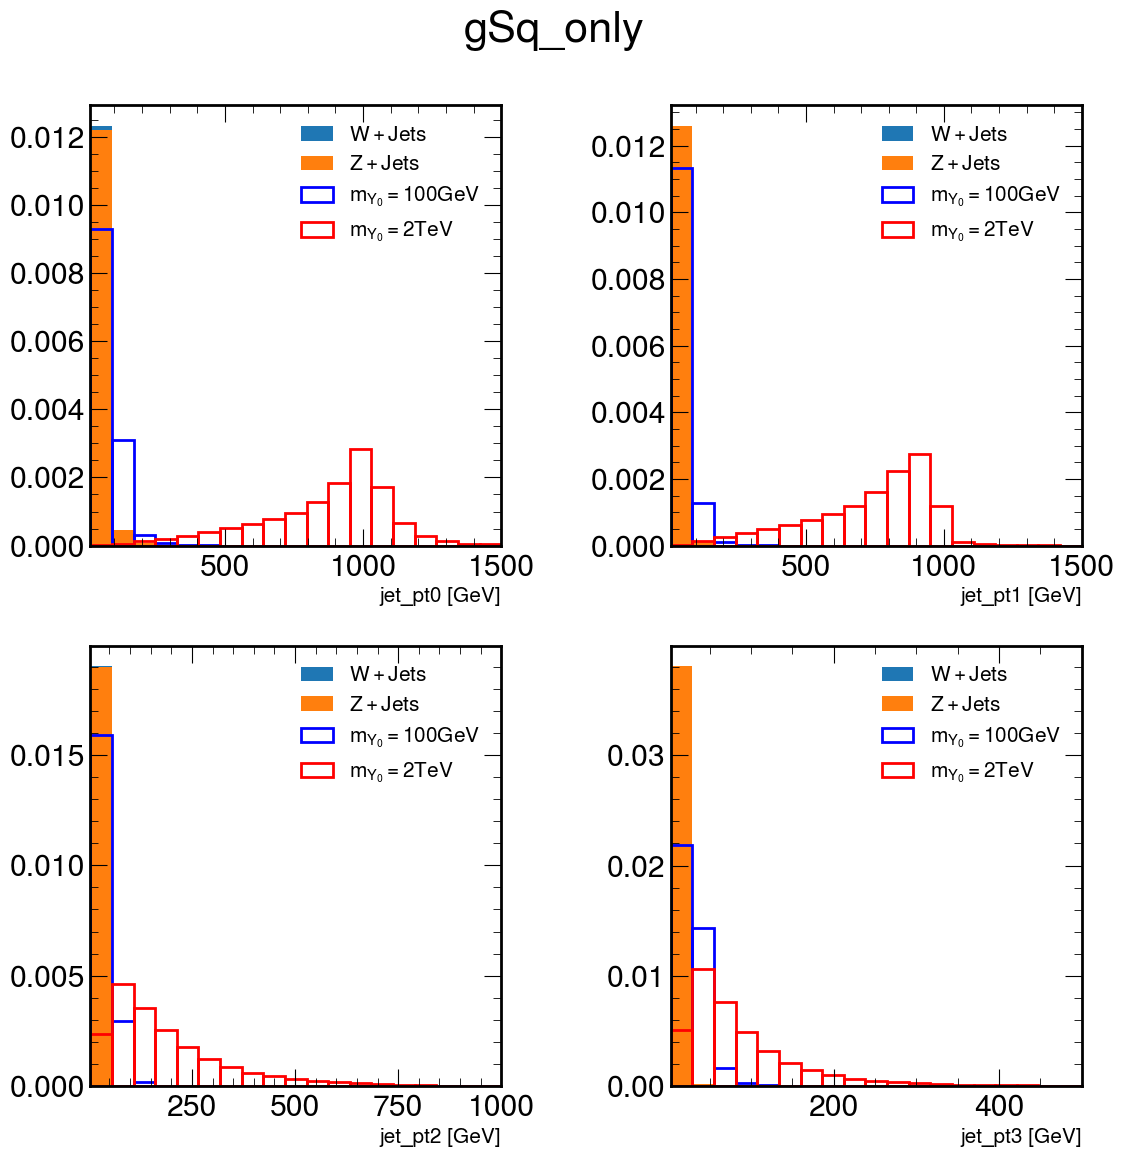

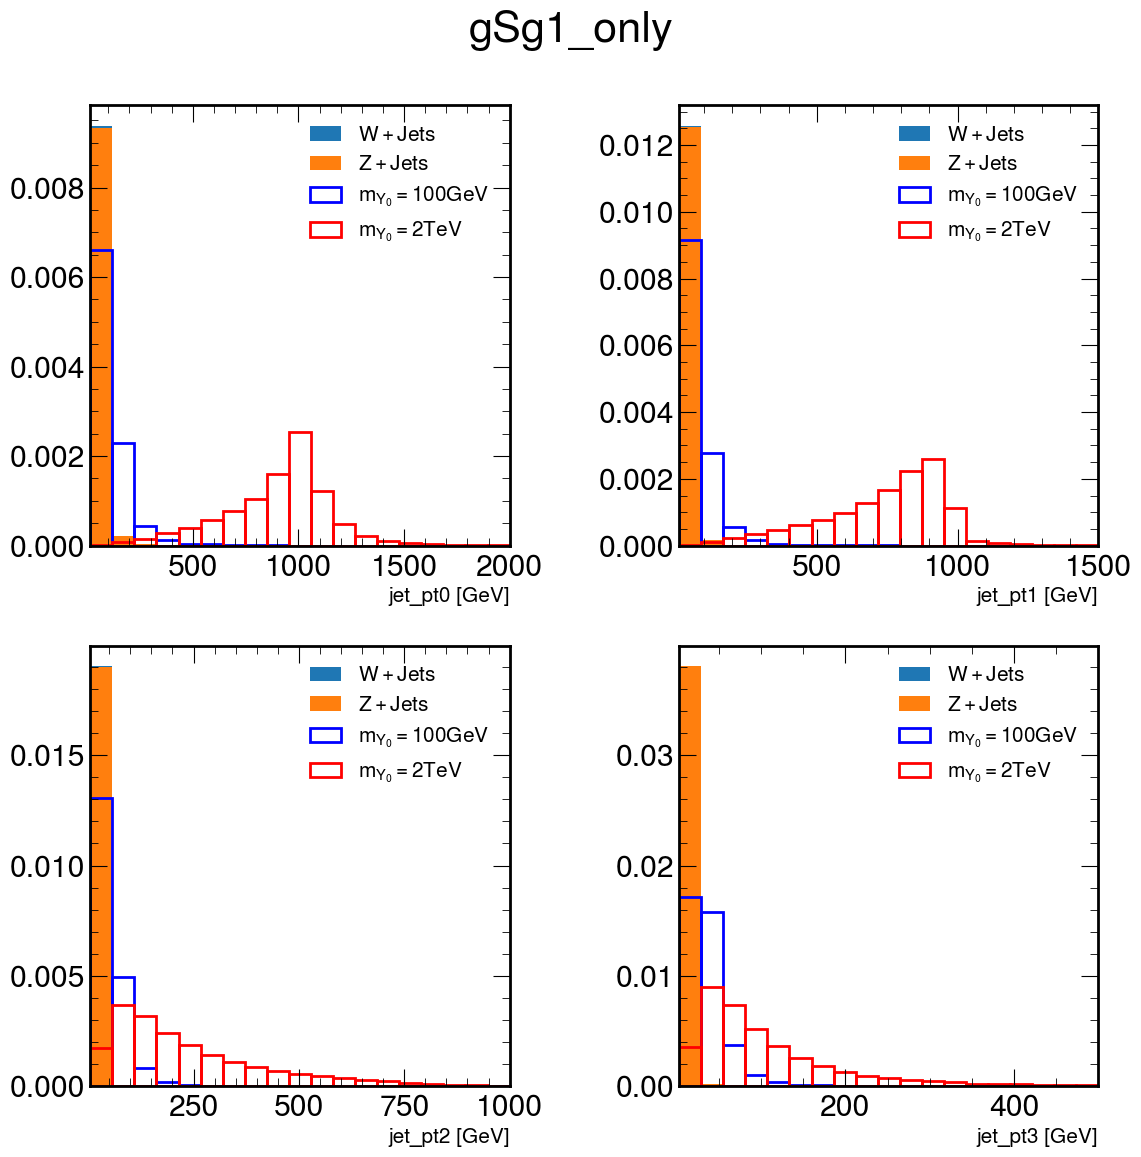

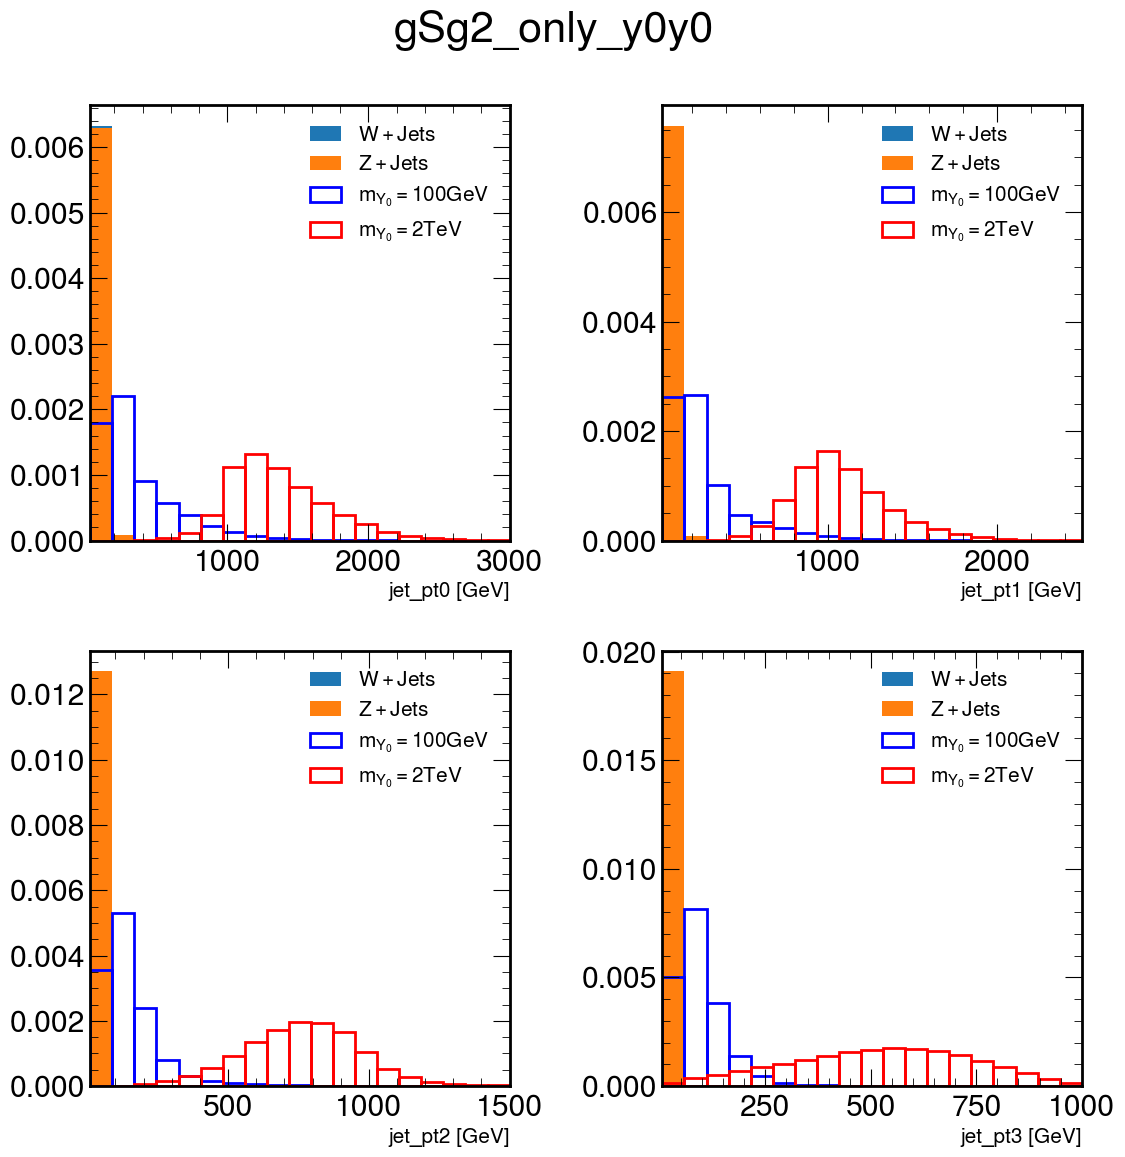

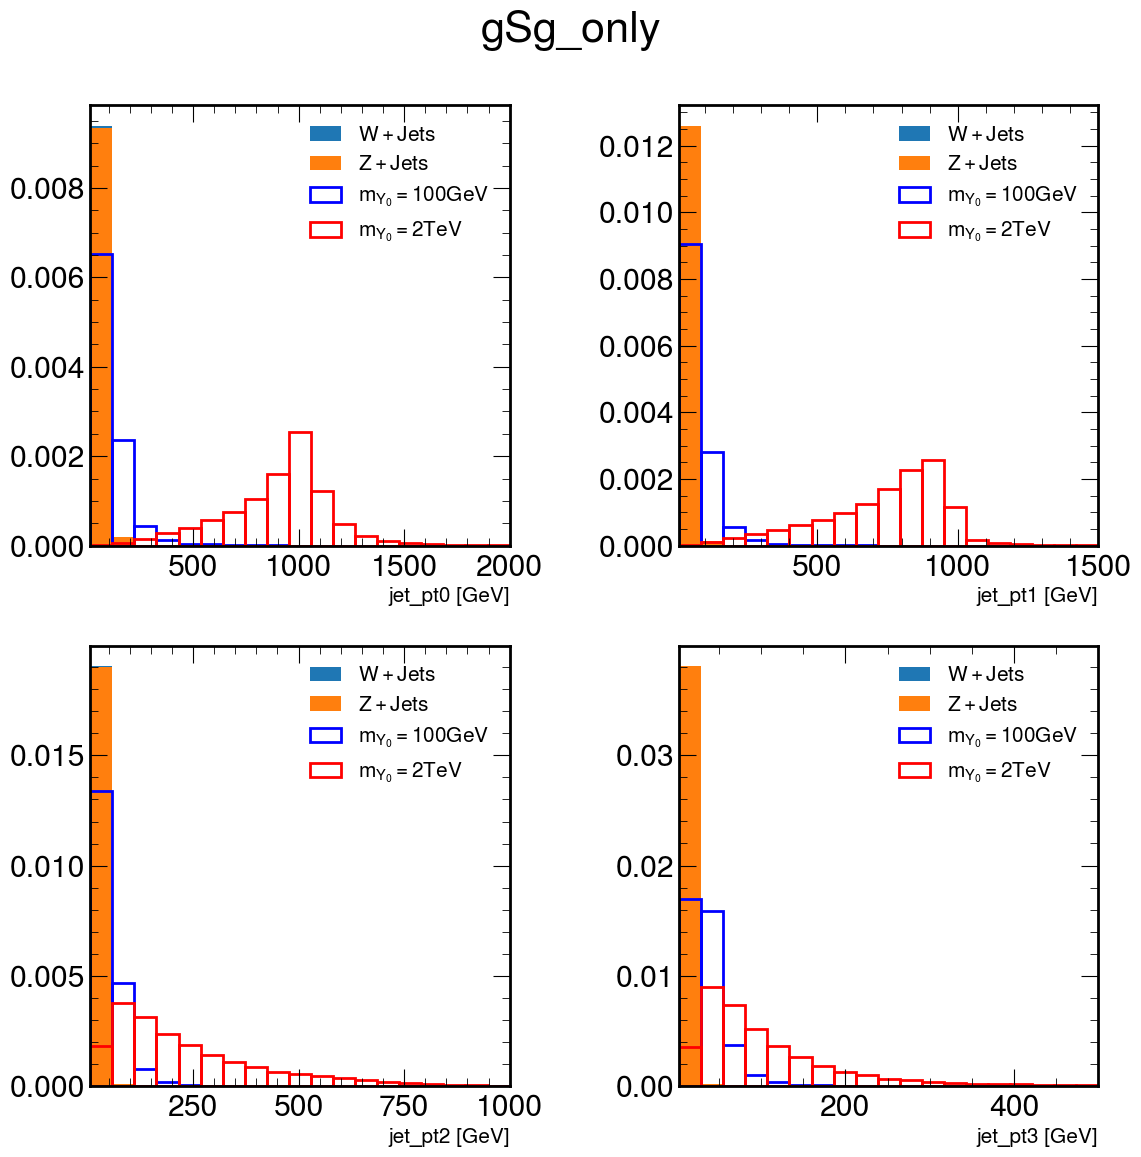

In [ ]:
nBins = 20
colors = ['blue', 'red']
legend = [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]
lims = {
    cases[0] : [1500, 1500, 1000, 500],
    cases[1] : [2000, 1500, 1000, 500],
    cases[2] : [3000, 2500, 1500, 1000],
    cases[3] : [2000, 1500, 1000, 500]
}
for i in cases:
    fig, ax = plt.subplots(2,2,figsize=(12,12))
    axes = [(i,j) for i in range(2) for j in range(2)]
    for j in range(4):
        variable = f"jet_pt{j}"
        maxValue = max([data[i][k][variable].max() for k in range(2)])
        minValue = min([data[i][k][variable].min() for k in range(2)])
        maxValue = min(maxValue, lims[i][j])
        rango = np.linspace(minValue, maxValue, nBins)
        
        ax[axes[j]].hist(data_WpJ[variable], bins=rango, density=True)
        ax[axes[j]].hist(data_ZpJ[variable], bins=rango, density=True)

        for k in range(2):
            ax[axes[j]].hist(data[i][k][variable], bins=rango, density=True, color=colors[k], edgecolor=colors[k], fc='None', lw=2)
        
        ax[axes[j]].set_xlabel(f"{variable} [GeV]", fontsize=15)
        ax[axes[j]].legend(legend, fontsize=15)
        ax[axes[j]].set_xlim(minValue, maxValue)
    
    plt.suptitle(i)
    fig.tight_layout()
    plt.show()

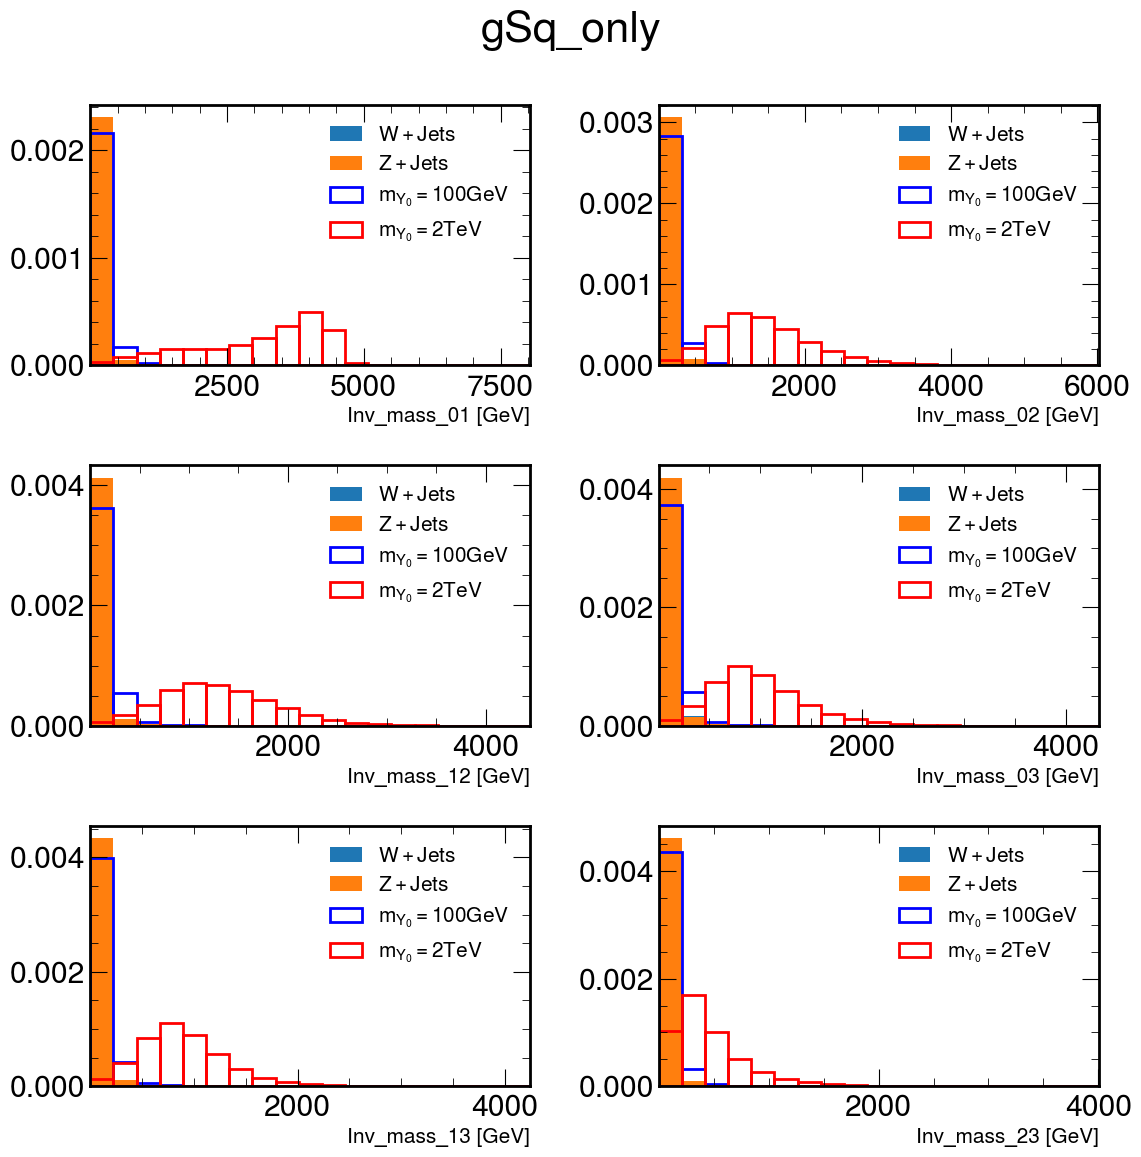

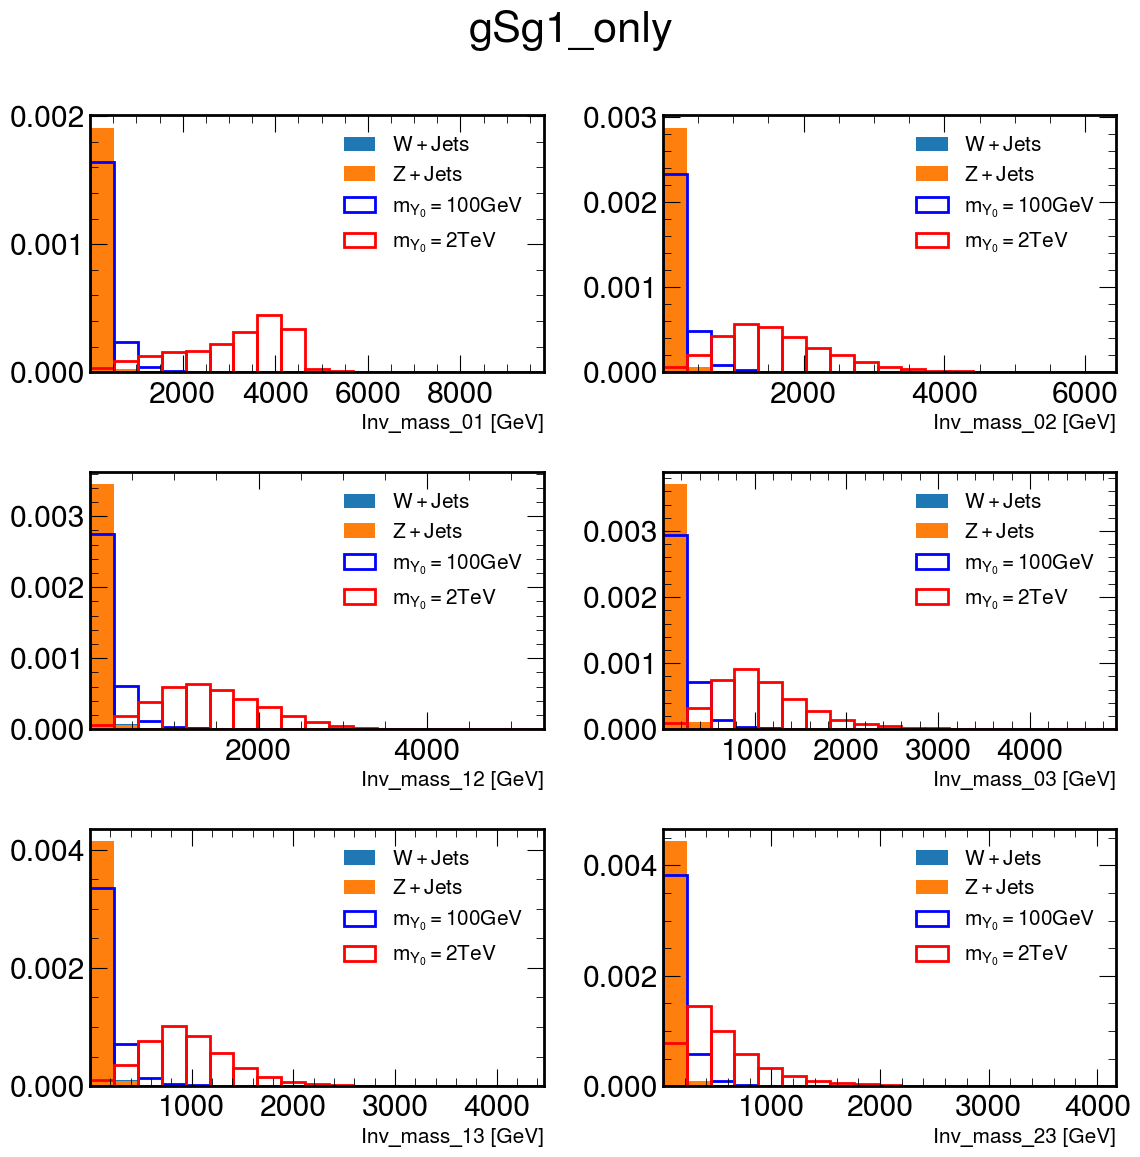

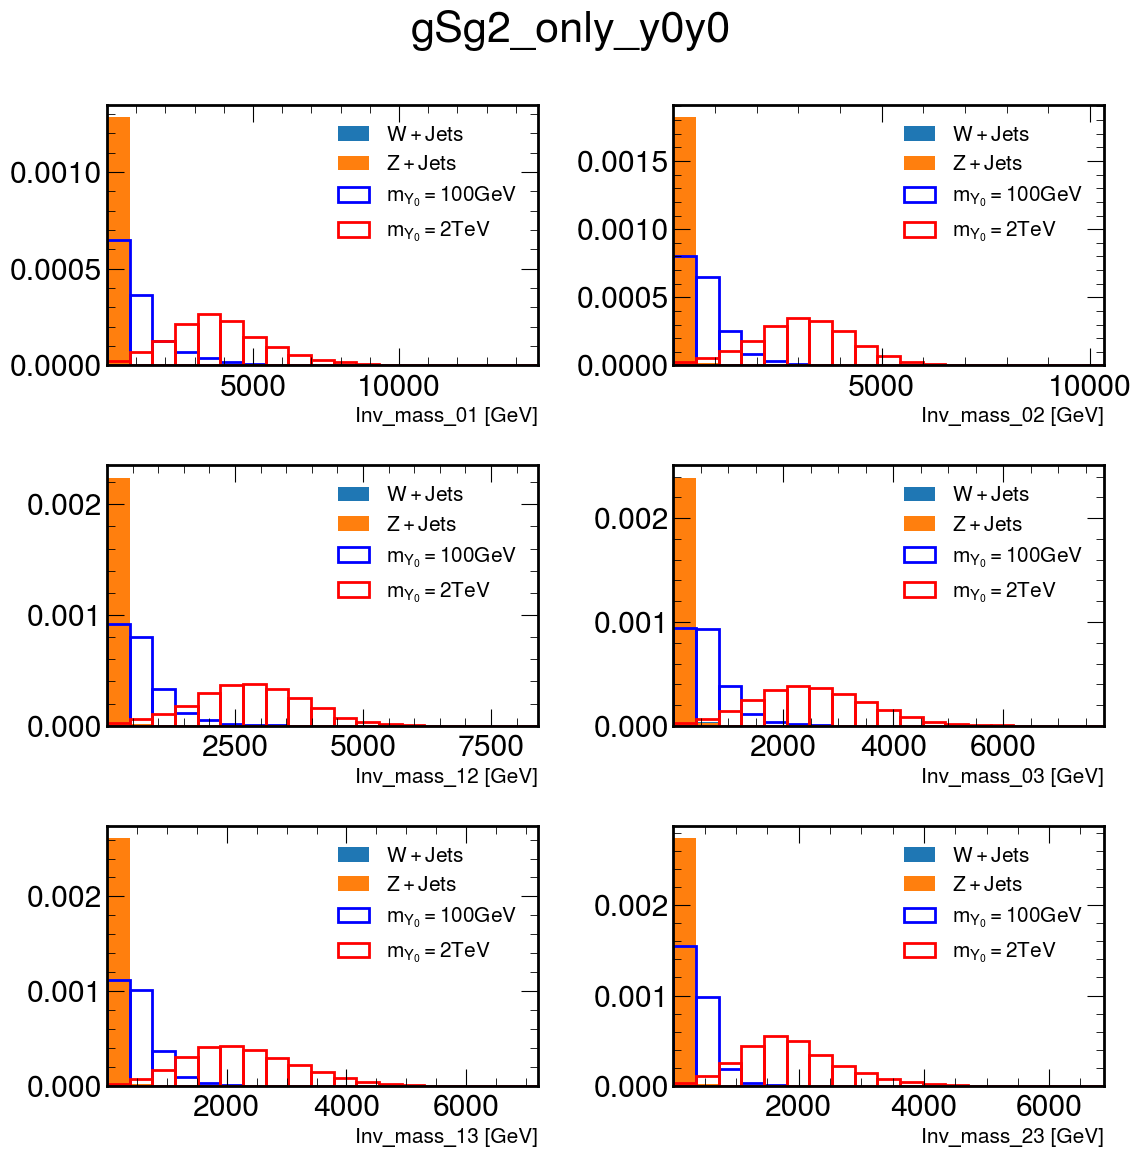

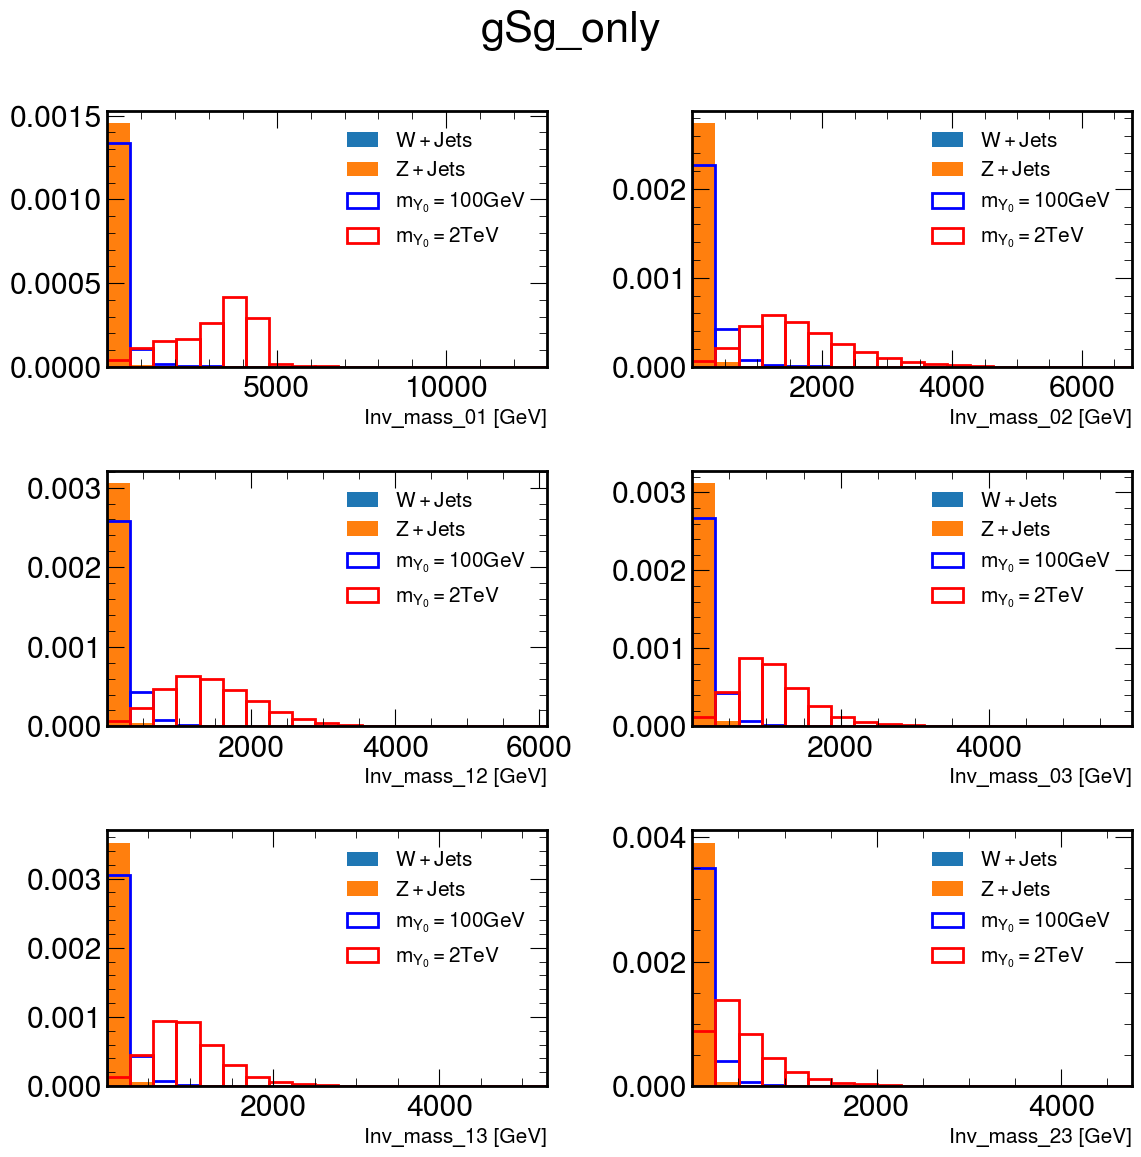

In [ ]:
nBins = 20
colors = ['blue', 'red']
legend = [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]
lims = {
    cases[0] : [1500, 1500, 1000, 500],
    cases[1] : [2000, 1500, 1000, 500],
    cases[2] : [3000, 2500, 1500, 1000],
    cases[3] : [2000, 1500, 1000, 500]
}

variables = []

for i in range(4):
    for j in range(4):
        if i <= j: continue
        variables.append(f"Inv_mass_{j}{i}")

for i in cases:
    fig, ax = plt.subplots(3,2, figsize=(12,12))
    axes = [(i,j) for i in range(3) for j in range(2)]
    for j in range(6):
        variable = variables[j]
        maxValue = max([data[i][k][variable].max() for k in range(2)])
        minValue = min([data[i][k][variable].min() for k in range(2)])
        rango = np.linspace(minValue, maxValue, nBins)

        ax[axes[j]].hist(data_WpJ[variable], bins=rango, density=True)
        ax[axes[j]].hist(data_ZpJ[variable], bins=rango, density=True)

        for k in range(2):
            ax[axes[j]].hist(data[i][k][variable], bins=rango, density=True, color=colors[k], edgecolor=colors[k], fc='None', lw=2)
        
        ax[axes[j]].set_xlabel(f"{variable} [GeV]", fontsize=15)
        ax[axes[j]].legend(legend, fontsize=15)
        ax[axes[j]].set_xlim(minValue,maxValue)
    
    plt.suptitle(i)
    fig.tight_layout()
    plt.show()

['Rapidity_prod_01', 'Rapidity_prod_02', 'Rapidity_prod_12', 'Rapidity_prod_03', 'Rapidity_prod_13', 'Rapidity_prod_23']


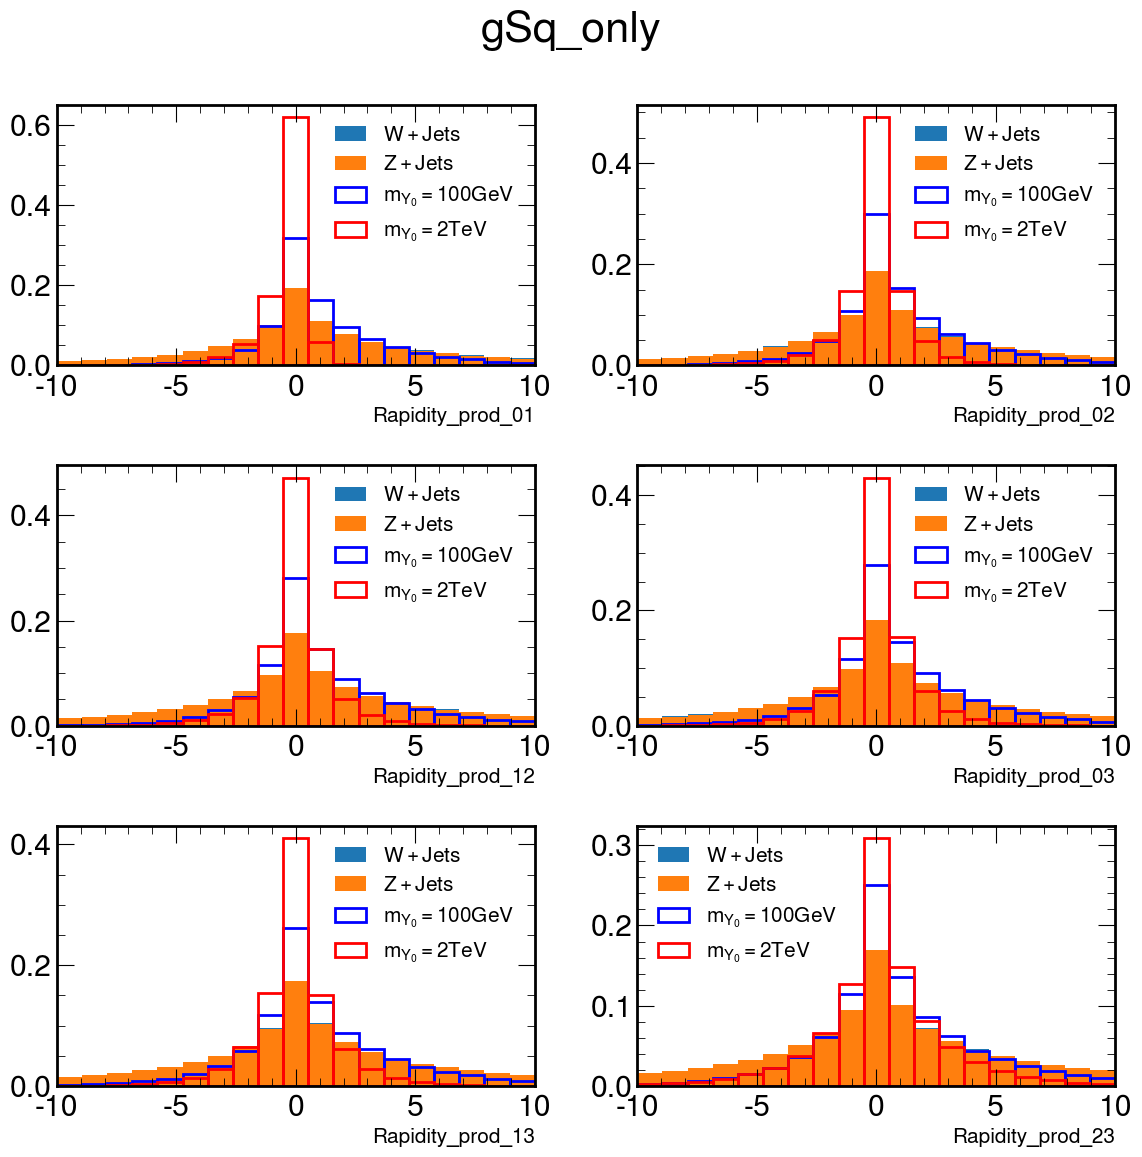

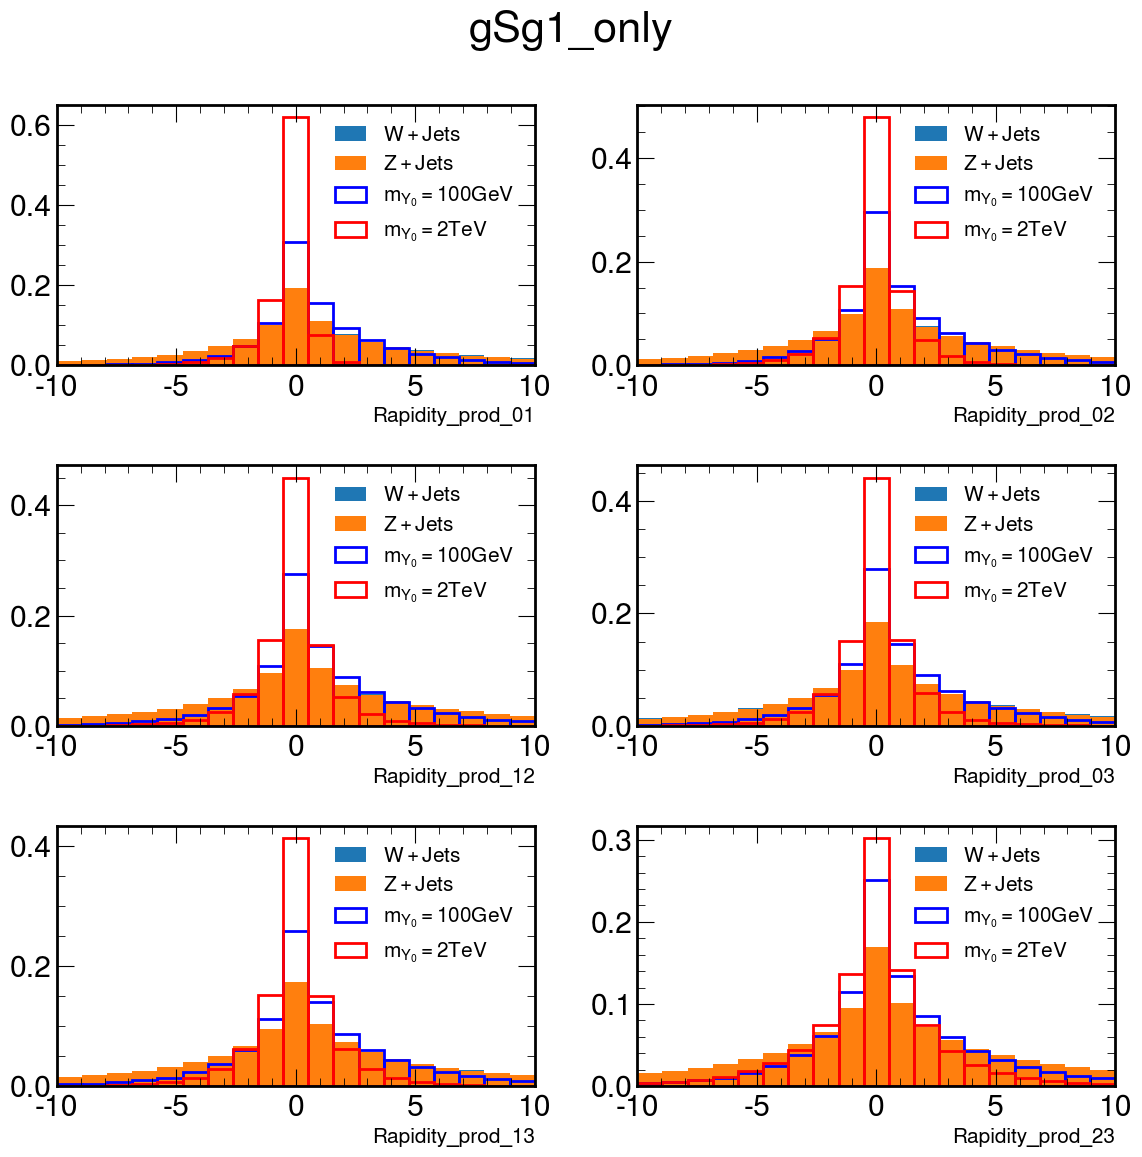

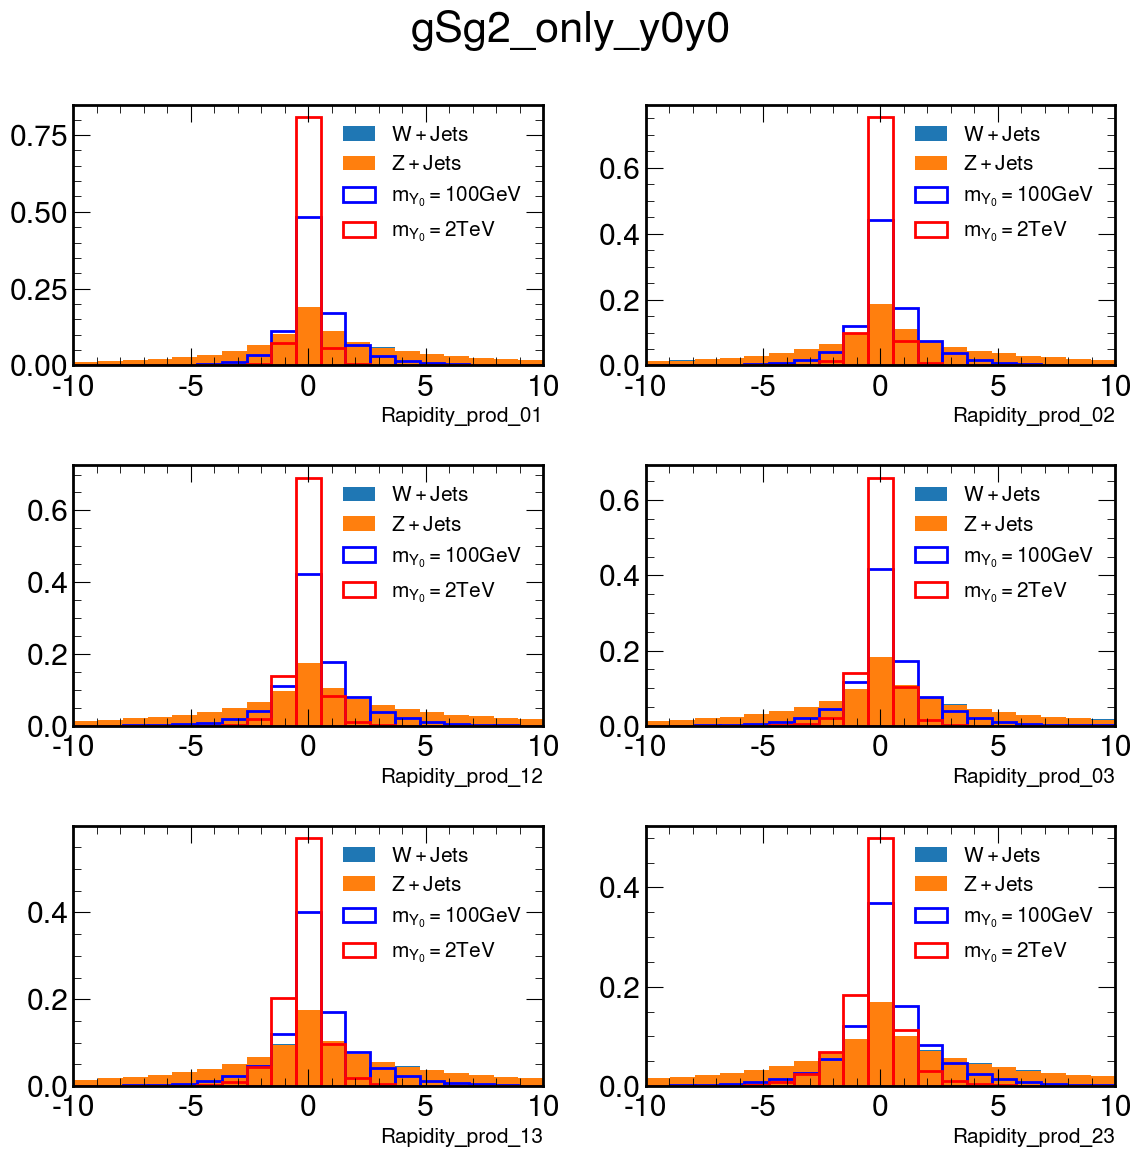

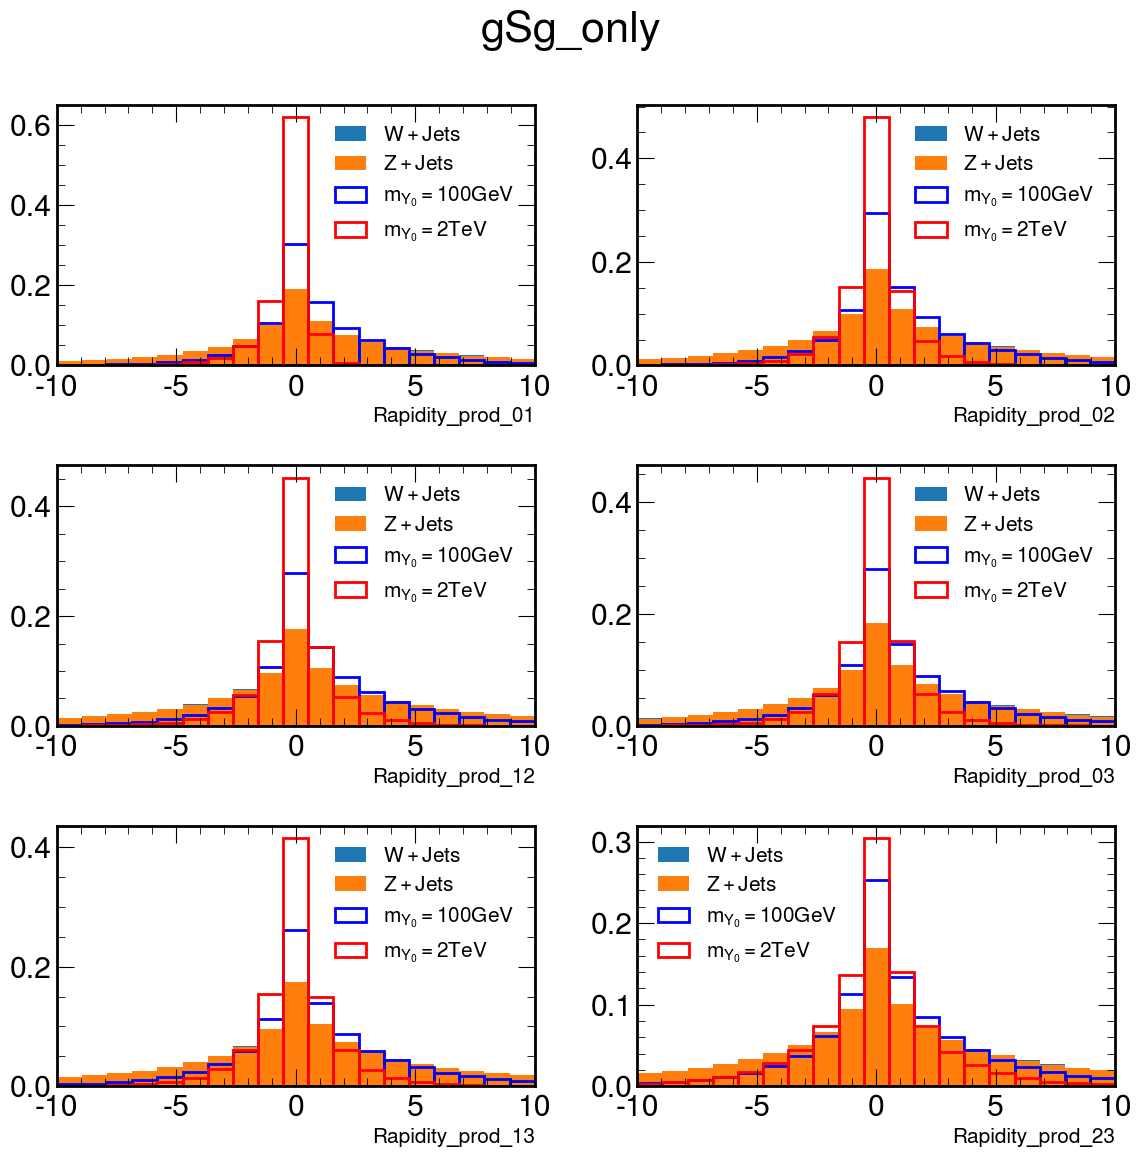

In [ ]:
nBins = 20
colors = ['blue', 'red']
legend = [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]
lims = {
    cases[0] : [1500, 1500, 1000, 500],
    cases[1] : [2000, 1500, 1000, 500],
    cases[2] : [3000, 2500, 1500, 1000],
    cases[3] : [2000, 1500, 1000, 500]
}

variables = []

for i in range(4):
    for j in range(4):
        if i <= j: continue
        variables.append(f"Rapidity_prod_{j}{i}")

for i in cases:
    fig, ax = plt.subplots(3,2, figsize=(12,12))
    axes = [(i,j) for i in range(3) for j in range(2)]
    for j in range(6):
        variable = variables[j]
        maxValue = max([data[i][k][variable].max() for k in range(2)])
        minValue = min([data[i][k][variable].min() for k in range(2)])
        maxValue = min(maxValue, 10)
        minValue = max(minValue, -10)
        rango = np.linspace(minValue, maxValue, nBins)

        ax[axes[j]].hist(data_WpJ[variable], bins=rango, density=True)
        ax[axes[j]].hist(data_ZpJ[variable], bins=rango, density=True)

        for k in range(2):
            ax[axes[j]].hist(data[i][k][variable], bins=rango, density=True, color=colors[k], edgecolor=colors[k], fc='None', lw=2)
        
        ax[axes[j]].set_xlabel(f"{variable}", fontsize=15)
        ax[axes[j]].legend(legend, fontsize=15)
        ax[axes[j]].set_xlim(minValue,maxValue)
    
    plt.suptitle(i)
    fig.tight_layout()
    plt.show()

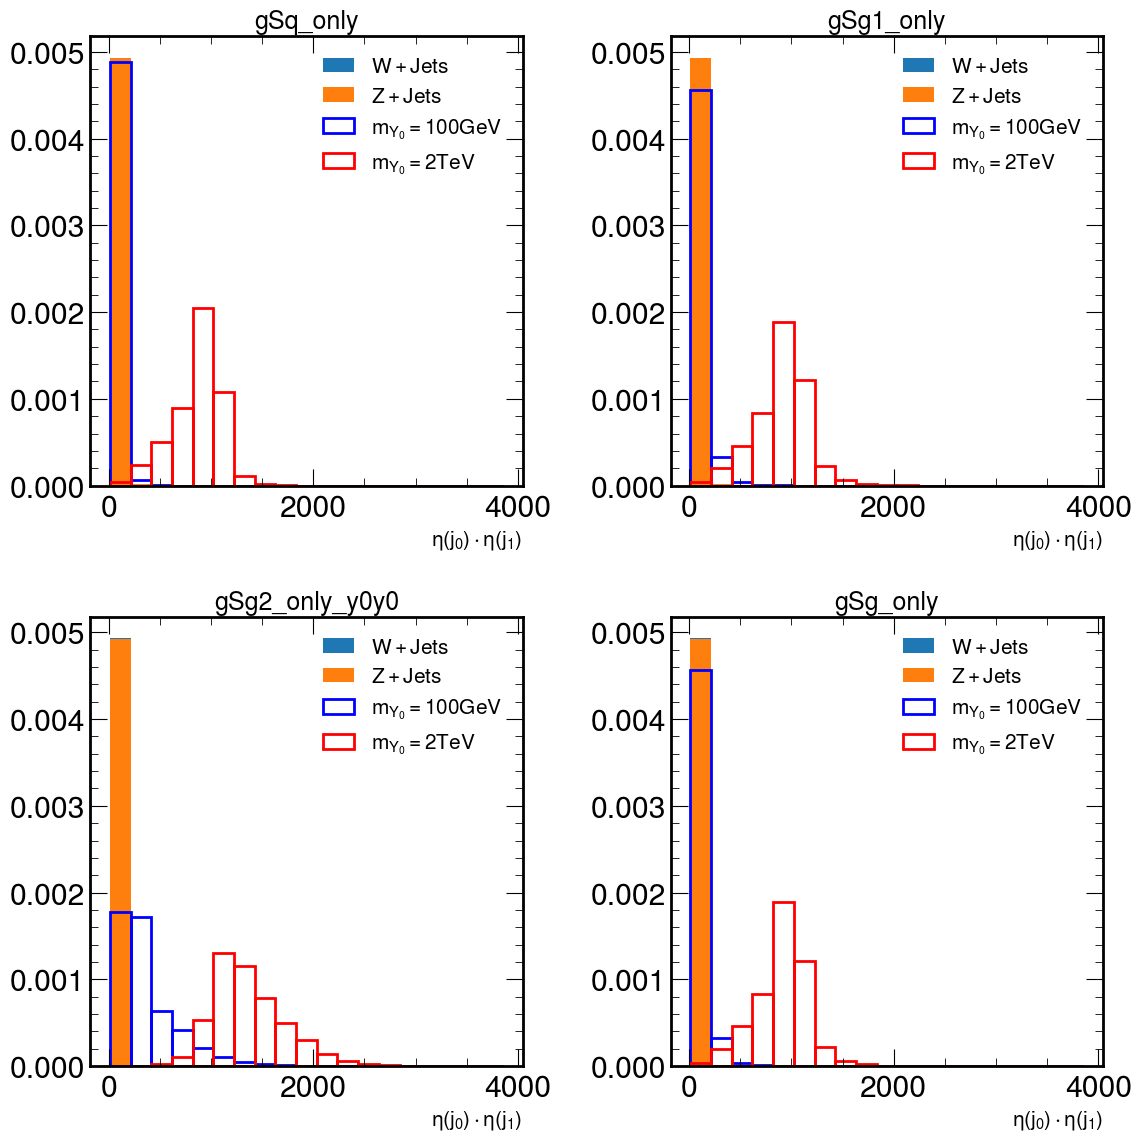

In [15]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'jet_pt0', r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"])

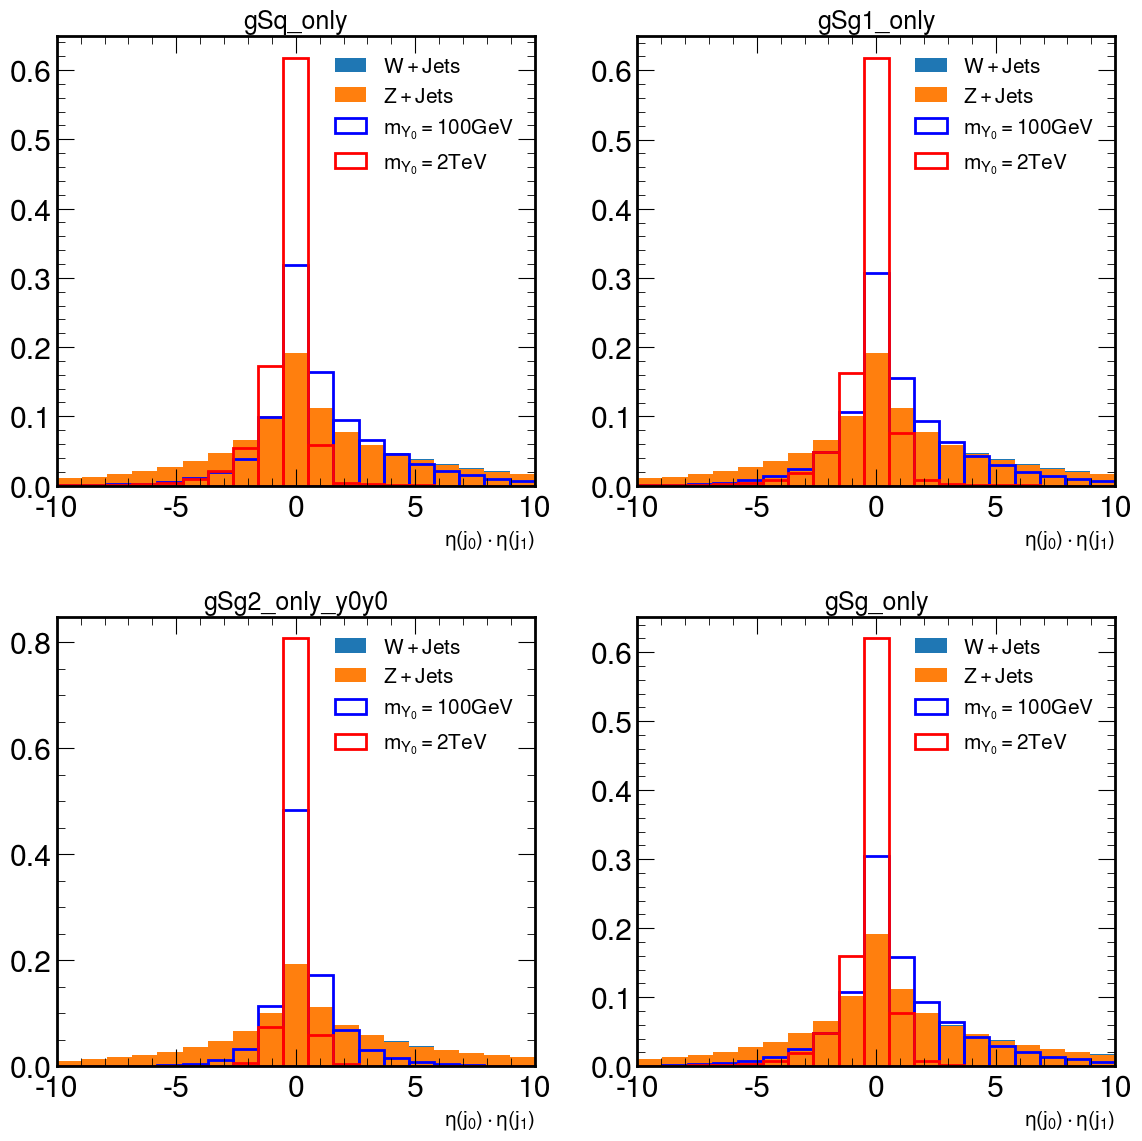

In [12]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Rapidity_prod', r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(-10,10))

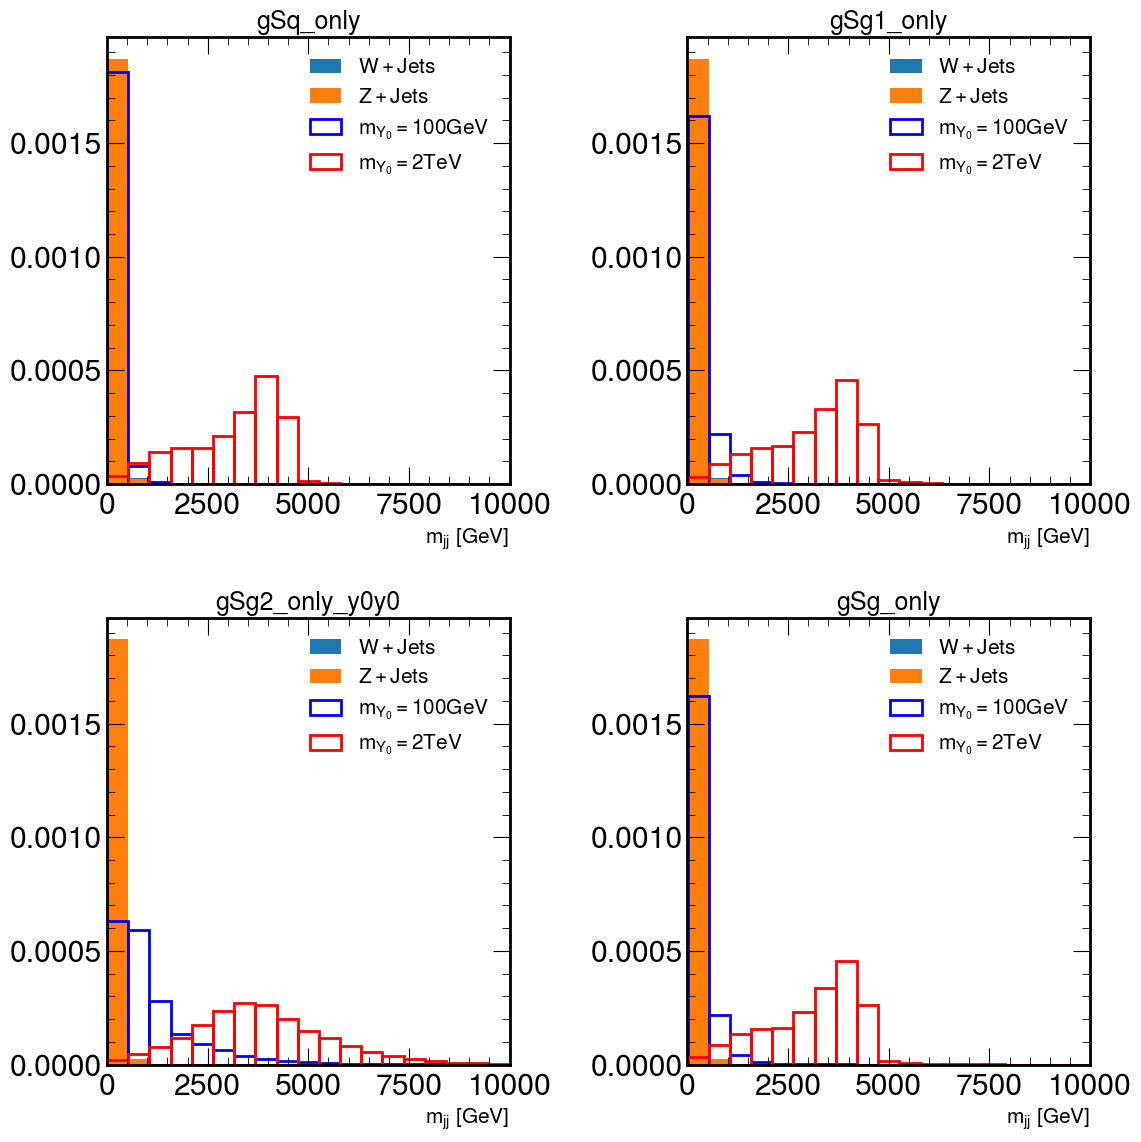

In [13]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Inv_mass', r"$m_{jj}$ [GeV]", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,10000))

In [14]:
for i in cases:
    for j in range(2):
        data[i][j] = data[i][j].query('Rapidity_prod < 0')

data_WpJ = data_WpJ.query('Rapidity_prod < 0')
data_ZpJ = data_ZpJ.query('Rapidity_prod < 0')

In [15]:
print("Número de Eventos para cada caso:")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])

Número de Eventos para cada caso:
Modelos:  [[34150, 63208], [37052, 59971], [41710, 51683], [36954, 59726]]
WpJets + ZpJets:  [1144714, 1125363]


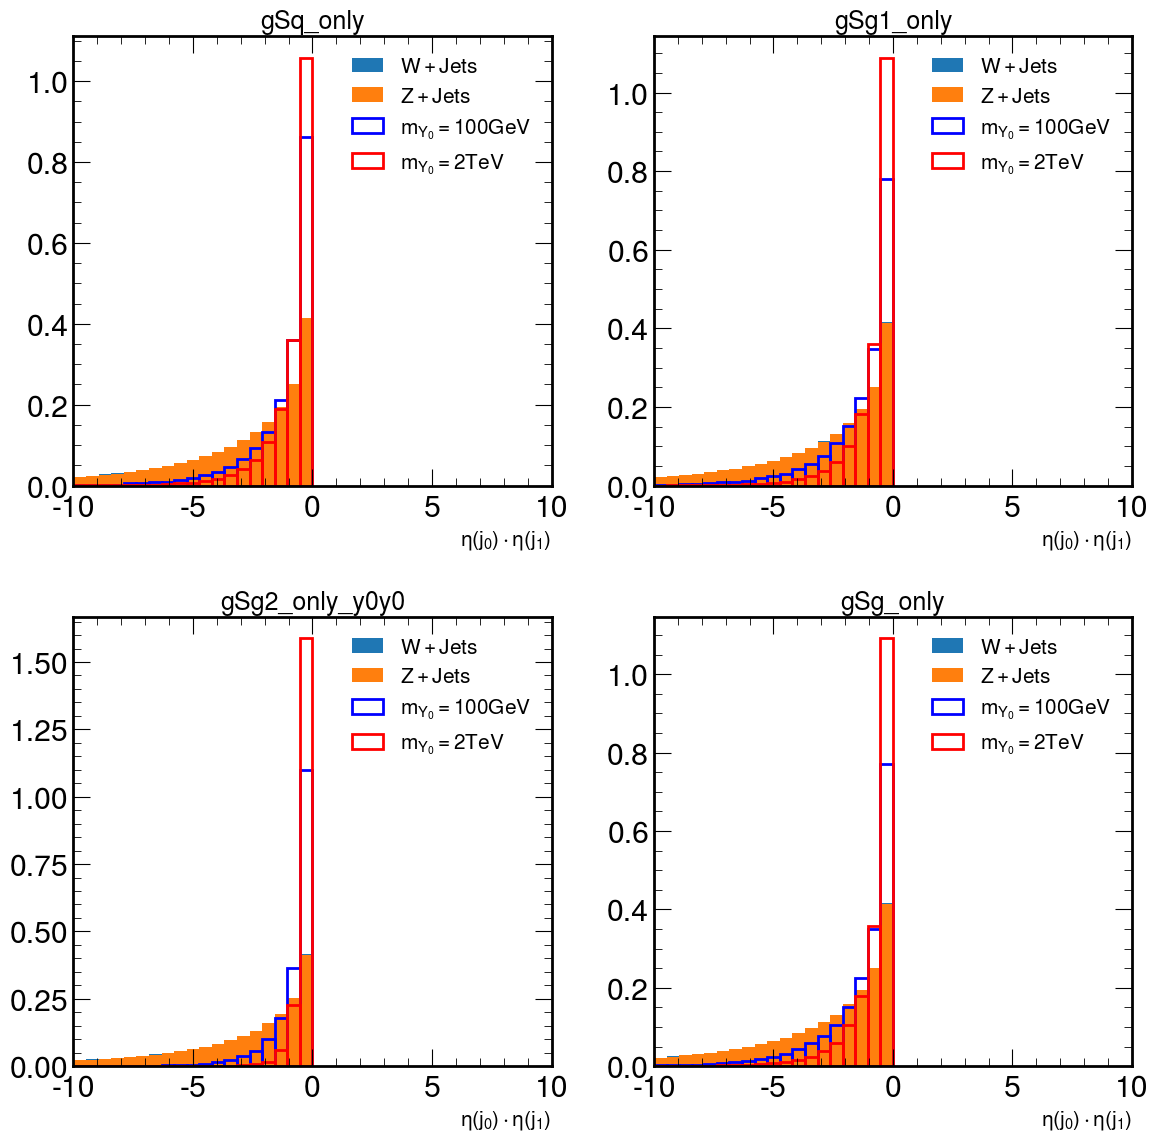

In [16]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Rapidity_prod', r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(-10,10))

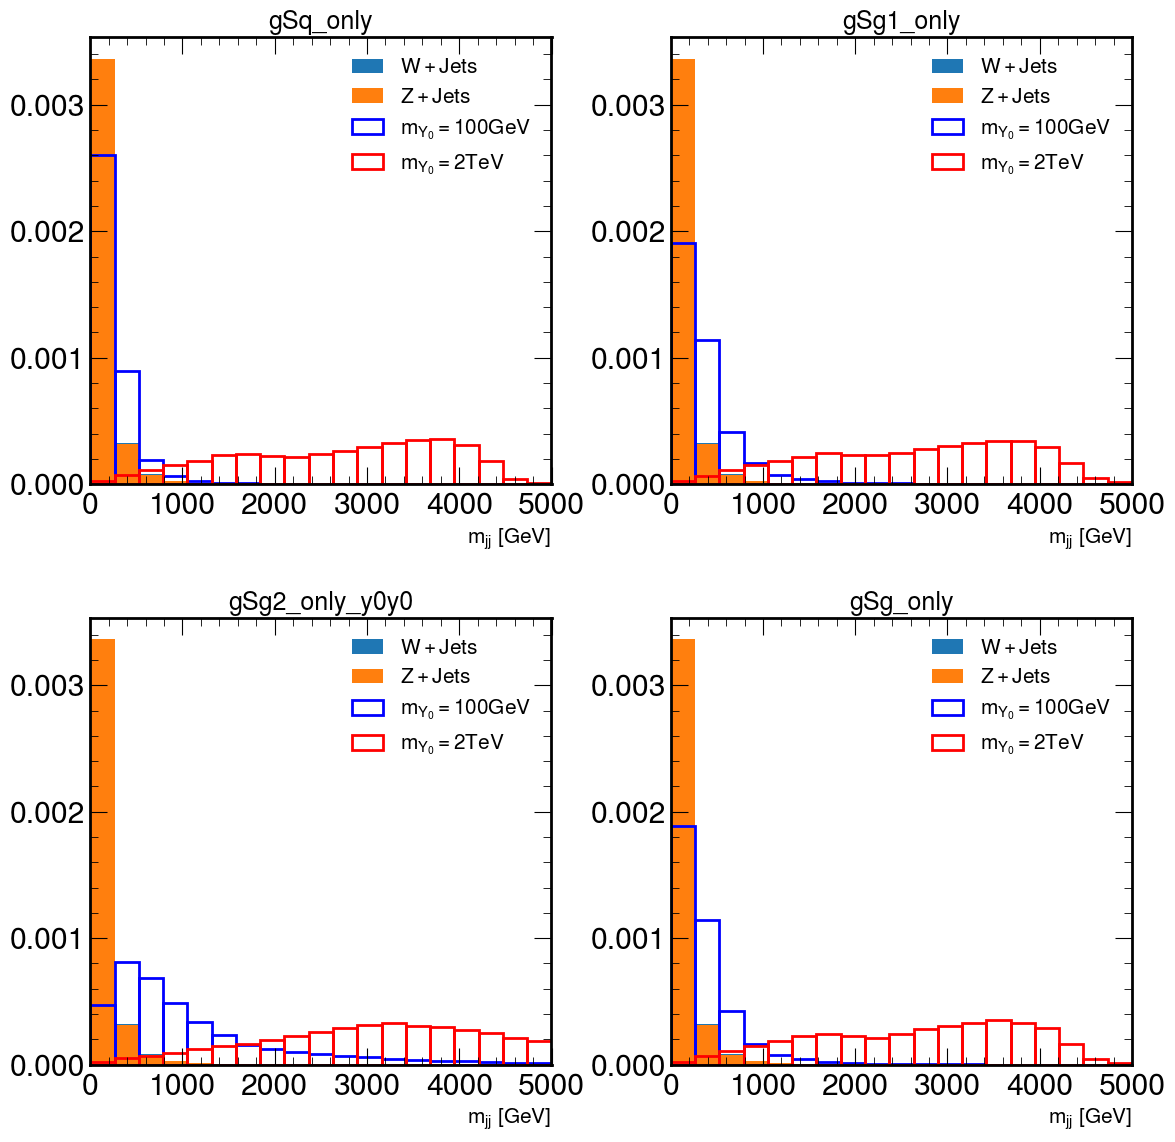

In [17]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Inv_mass', r"$m_{jj}$ [GeV]", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,5000))

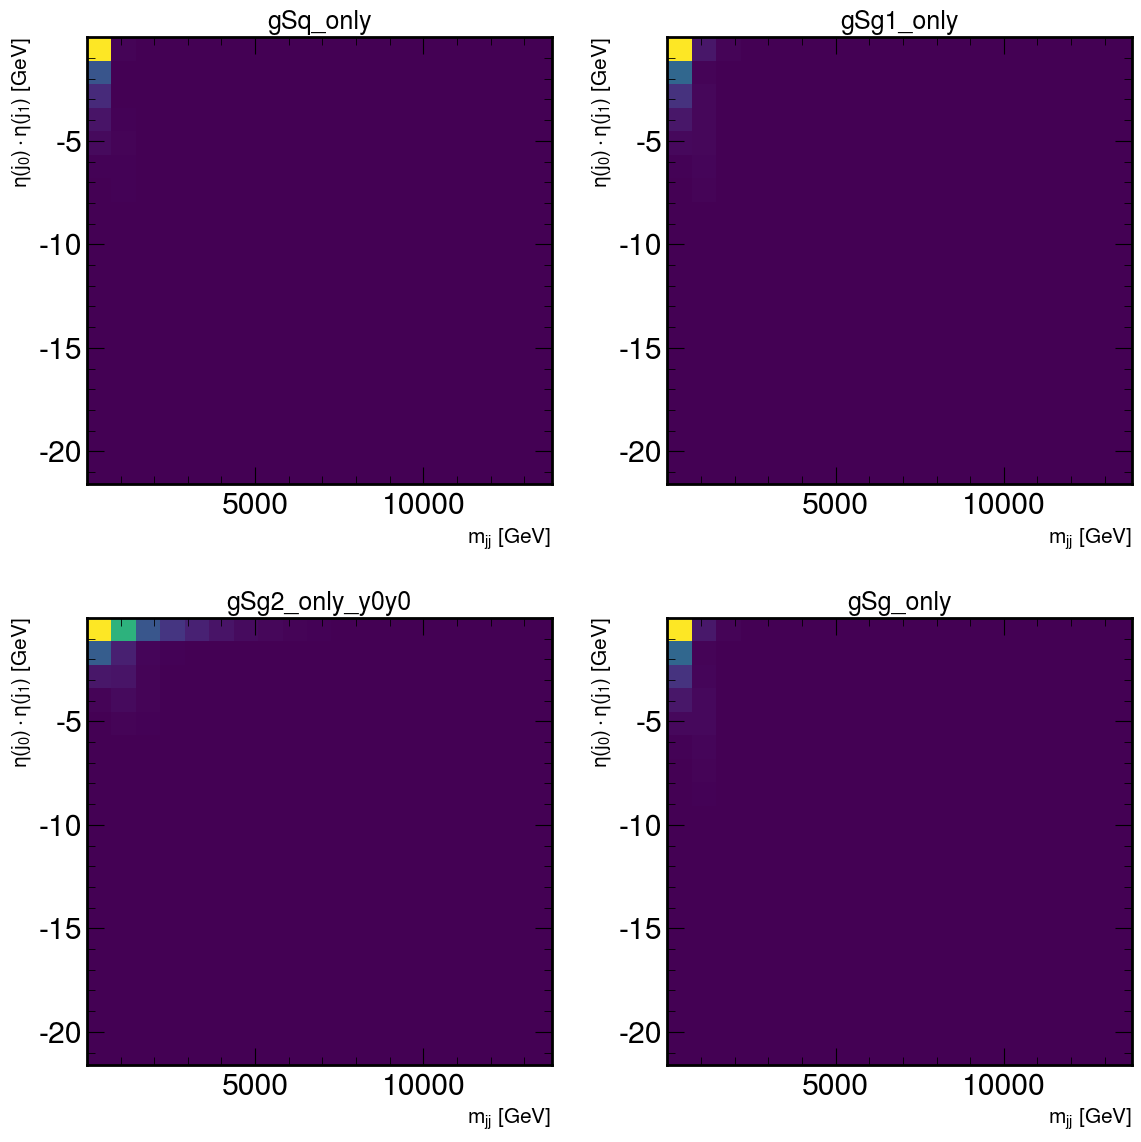

In [18]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable1 = 'Inv_mass'
variable2 = 'Rapidity_prod'
nBins = 20
#
#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

maxValue = max([data[i][j][variable1].max() for i in cases for j in range(2)])
minValue = min([data[i][j][variable1].min() for i in cases for j in range(2)])

rango1 = np.linspace(minValue, maxValue, nBins)

maxValue = max([data[i][j][variable2].max() for i in cases for j in range(2)])
minValue = min([data[i][j][variable2].min() for i in cases for j in range(2)])

rango2 = np.linspace(minValue, maxValue, nBins)

rango = [rango1, rango2]

colors = ['blue', 'red']

#for i in range(2):
#    for j in range(2):
#        ax[i,j].hist2d(data_WpJ[variable1], data_WpJ[variable2], bins=rango, density=True)
#        ax[i,j].hist2d(data_ZpJ[variable1], data_ZpJ[variable2], bins=rango, density=True)

for i in range(1):
    ax[0,0].hist2d(data[cases[0]][i][variable1], data[cases[0]][i][variable2], bins=rango, density=True)
    ax[0,1].hist2d(data[cases[1]][i][variable1], data[cases[1]][i][variable2], bins=rango, density=True)
    ax[1,0].hist2d(data[cases[2]][i][variable1], data[cases[2]][i][variable2], bins=rango, density=True)
    ax[1,1].hist2d(data[cases[3]][i][variable1], data[cases[3]][i][variable2], bins=rango, density=True)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        #ax[i,j].vlines(1300, ymin=-15, ymax=0, color='red', linestyle='dashed')
        ax[i,j].set_xlabel(r"$m_{jj}$ [GeV]",fontsize=15)
        ax[i,j].set_ylabel(r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$ [GeV]",fontsize=15)


fig.tight_layout()
plt.show()


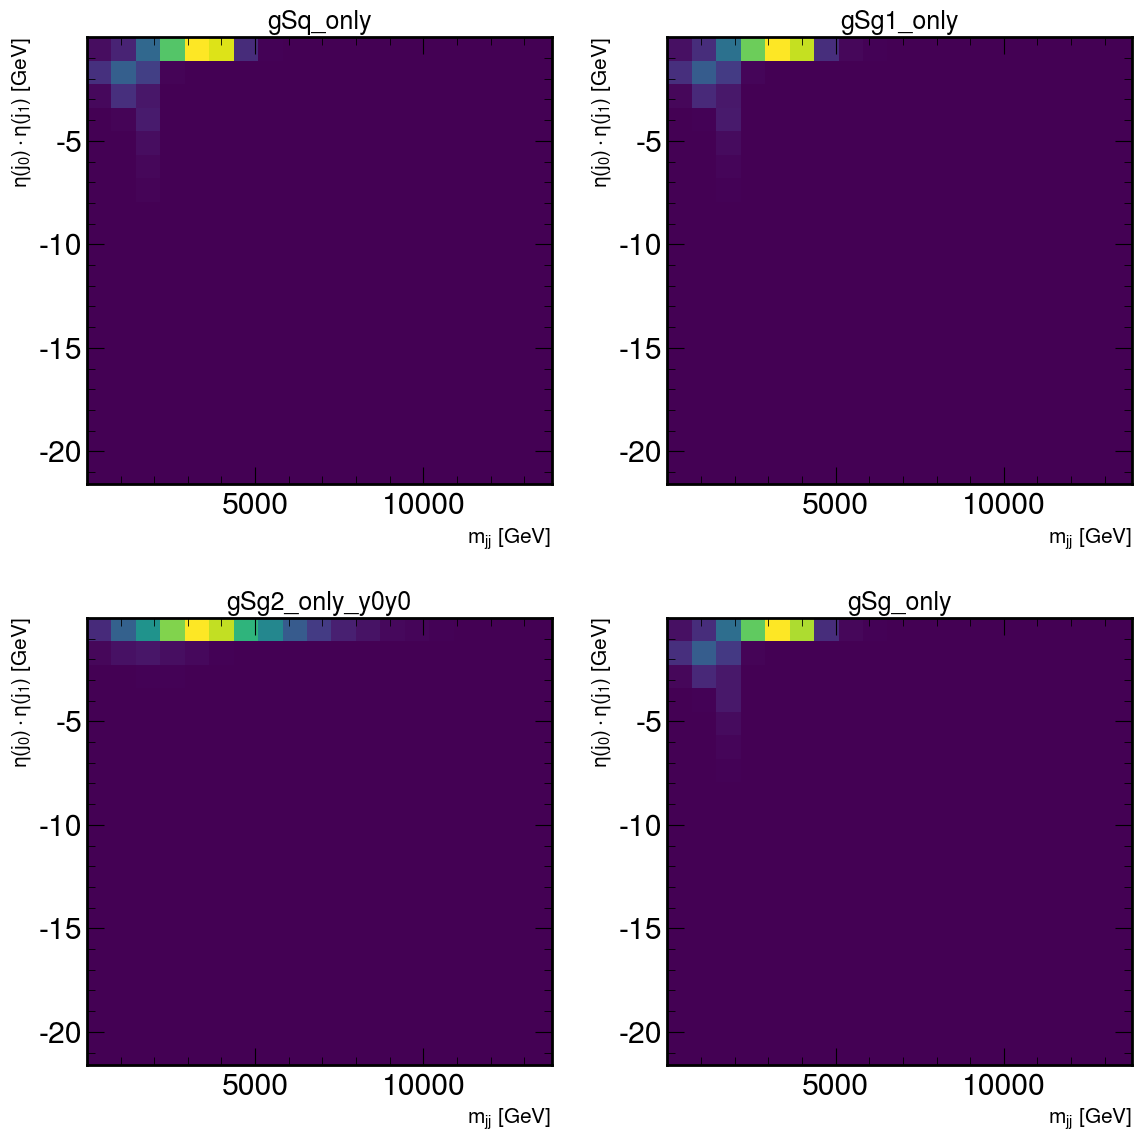

In [19]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable1 = 'Inv_mass'
variable2 = 'Rapidity_prod'
nBins = 20
#
#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

maxValue = max([data[i][j][variable1].max() for i in cases for j in range(2)])
minValue = min([data[i][j][variable1].min() for i in cases for j in range(2)])

rango1 = np.linspace(minValue, maxValue, nBins)

maxValue = max([data[i][j][variable2].max() for i in cases for j in range(2)])
minValue = min([data[i][j][variable2].min() for i in cases for j in range(2)])

rango2 = np.linspace(minValue, maxValue, nBins)

rango = [rango1, rango2]

colors = ['blue', 'red']

#for i in range(2):
#    for j in range(2):
#        ax[i,j].hist2d(data_WpJ[variable1], data_WpJ[variable2], bins=rango, density=True)
#        ax[i,j].hist2d(data_ZpJ[variable1], data_ZpJ[variable2], bins=rango, density=True)

for i in range(1,2):
    ax[0,0].hist2d(data[cases[0]][i][variable1], data[cases[0]][i][variable2], bins=rango, density=True)
    ax[0,1].hist2d(data[cases[1]][i][variable1], data[cases[1]][i][variable2], bins=rango, density=True)
    ax[1,0].hist2d(data[cases[2]][i][variable1], data[cases[2]][i][variable2], bins=rango, density=True)
    ax[1,1].hist2d(data[cases[3]][i][variable1], data[cases[3]][i][variable2], bins=rango, density=True)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        #ax[i,j].vlines(3000, ymin=-15, ymax=0, color='red', linestyle='dashed')
        ax[i,j].set_xlabel(r"$m_{jj}$ [GeV]",fontsize=15)
        ax[i,j].set_ylabel(r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$ [GeV]",fontsize=15)


fig.tight_layout()
plt.show()


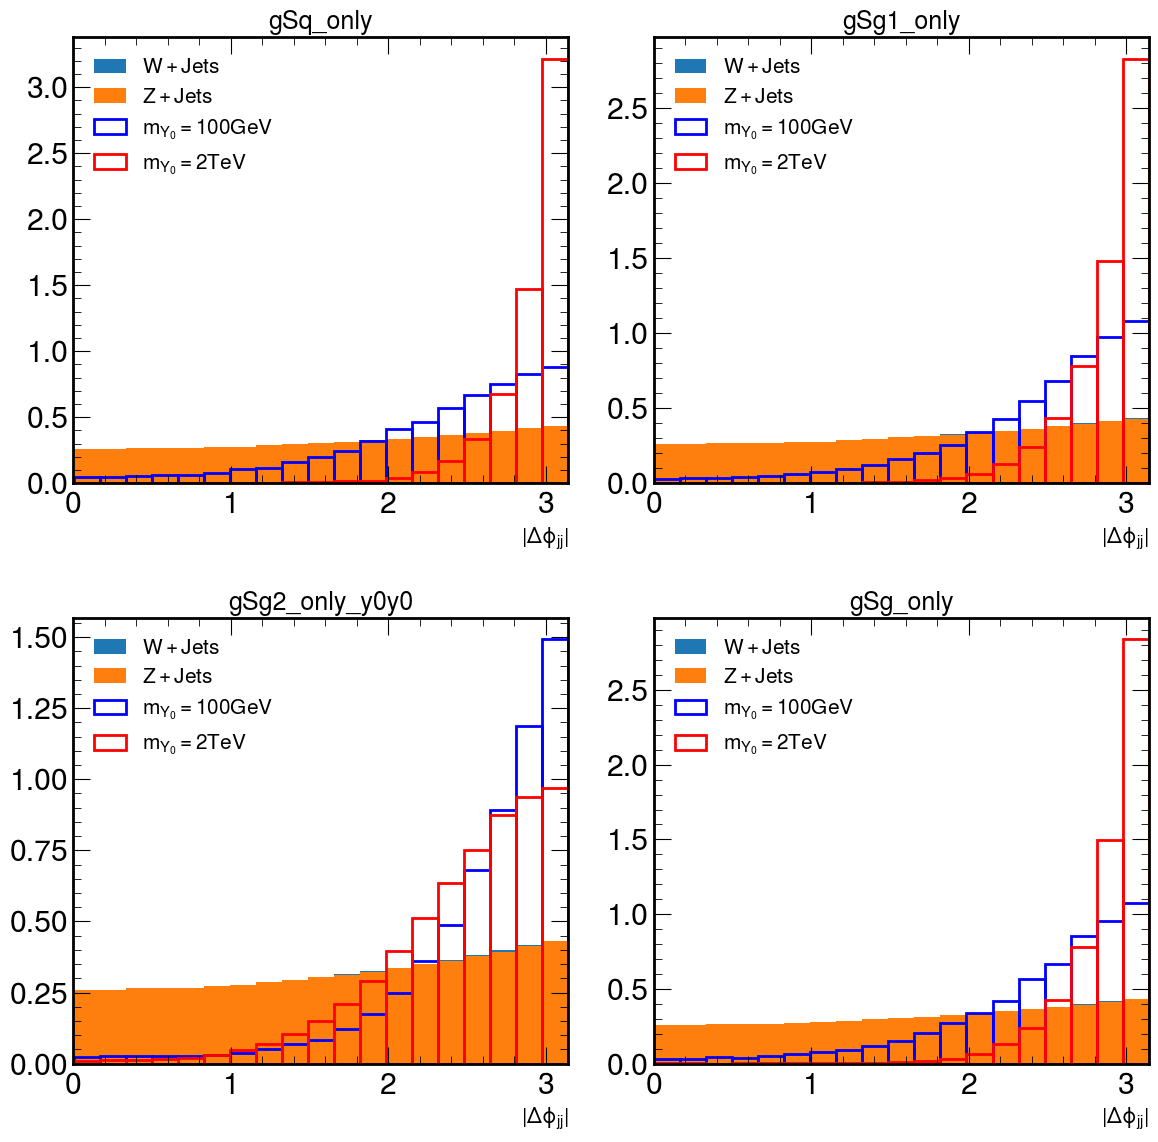

In [20]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Delta_phi', r"$|\Delta\phi_{jj}|$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,np.pi))

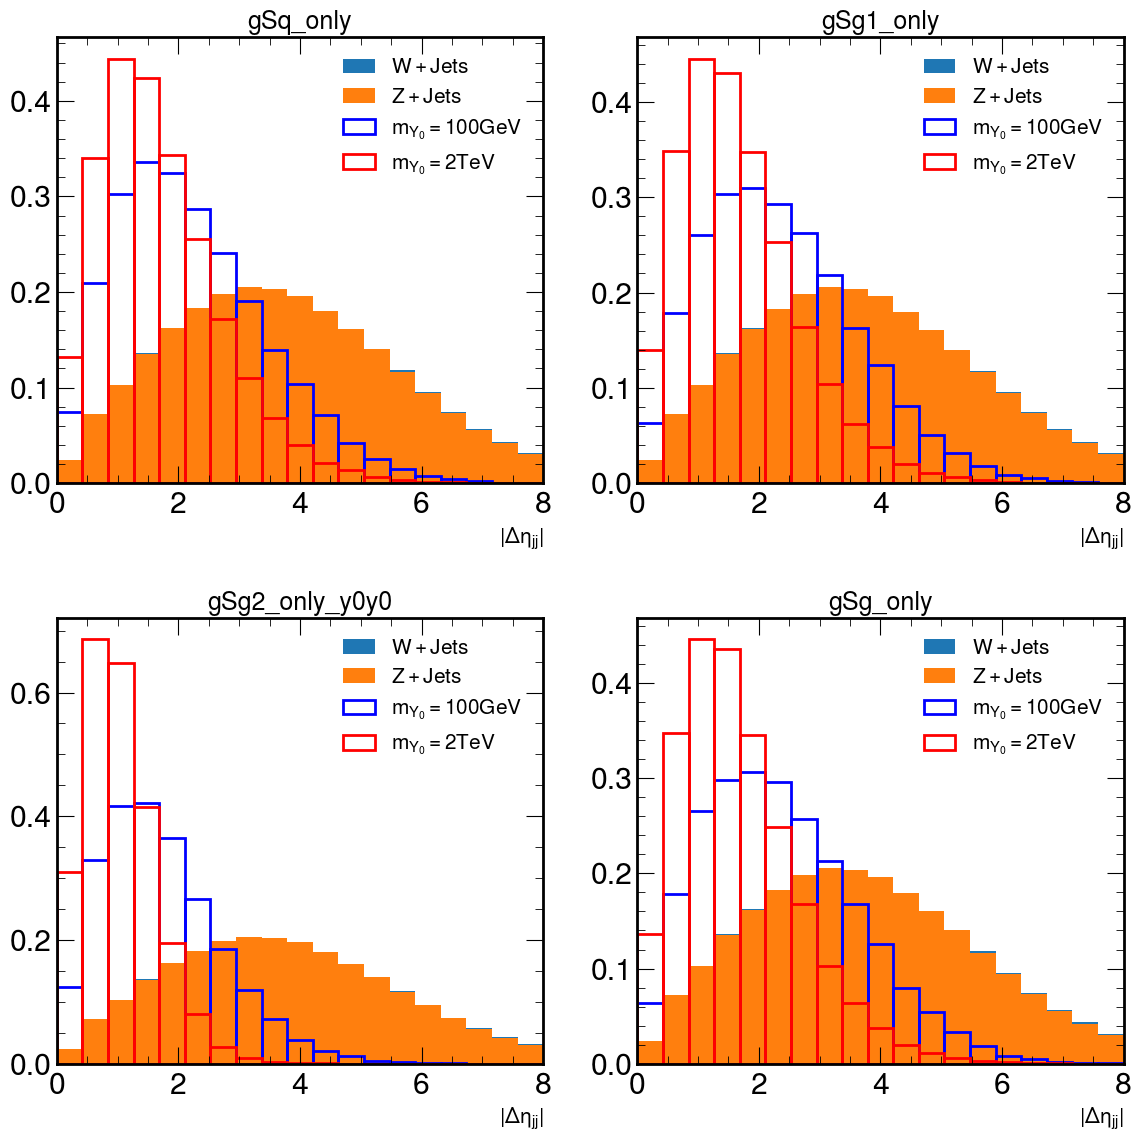

In [21]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Delta_rapidity', r"$|\Delta\eta_{jj}|$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,8))

# Significance

Weights

$$W = \frac{N_{fisicos}}{N_{MG+Pythia}}$$

In [22]:
Weights = pd.read_csv("BGweigths.csv").to_dict()
# Luminosity to normalize
lum = 1 # fb-1

for i in cases:
    Weights[i] = []
    for j in range(2):
        Weights[i].append(CSs[i][j]*1000*lum/data[i][j].shape[0])

In [23]:
Weights['WpJets'] = Weights['WpJets'][0]
Weights['ZpJets'] = Weights['ZpJets'][0]
Weights.pop('Unnamed: 0')

{0: 0}

In [24]:
Weights

{'WpJets': 11.05892710781906,
 'ZpJets': 3.1770967293353003,
 'gSq_only': [0.0029282576866764276, 0.0015820782179470953],
 'gSg1_only': [5.674862355608334, 0.11617281686148306],
 'gSg2_only_y0y0': [0.002397506593143131, 0.0019348722016910784],
 'gSg_only': [5.692347242517725, 0.11663764524662626]}

### Cut in $p_{T}(j_{0})$

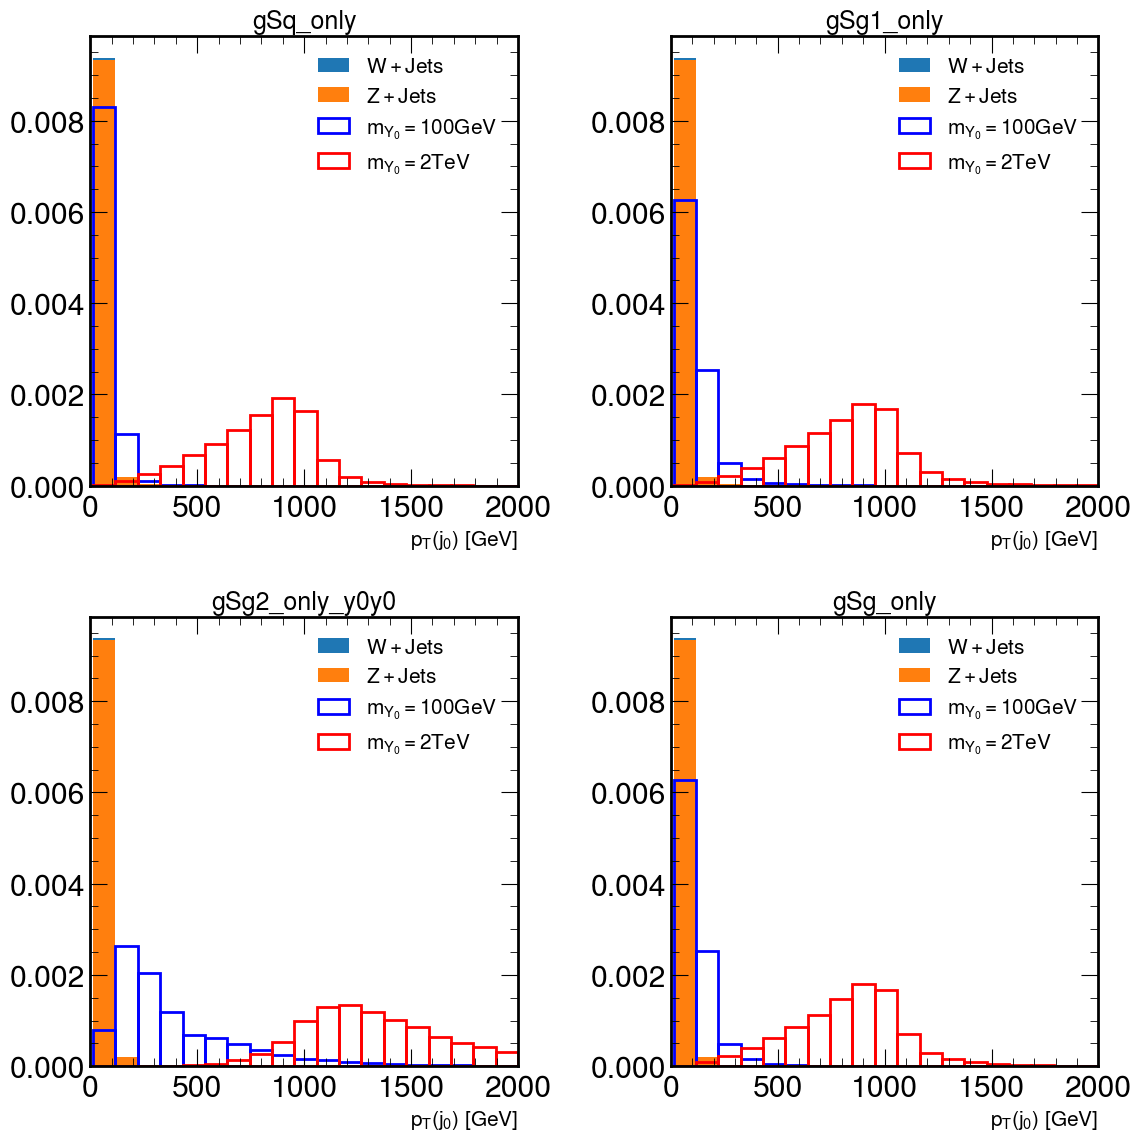

In [25]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'jet_pt0', r"$p_{T}{(j_{0})}$ [GeV]", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,2000))

In [26]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt0', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:349: RuntimeWarning: invalid value encountered in scalar divide
  Z[i][j][k] = S / np.sqrt(S + B)


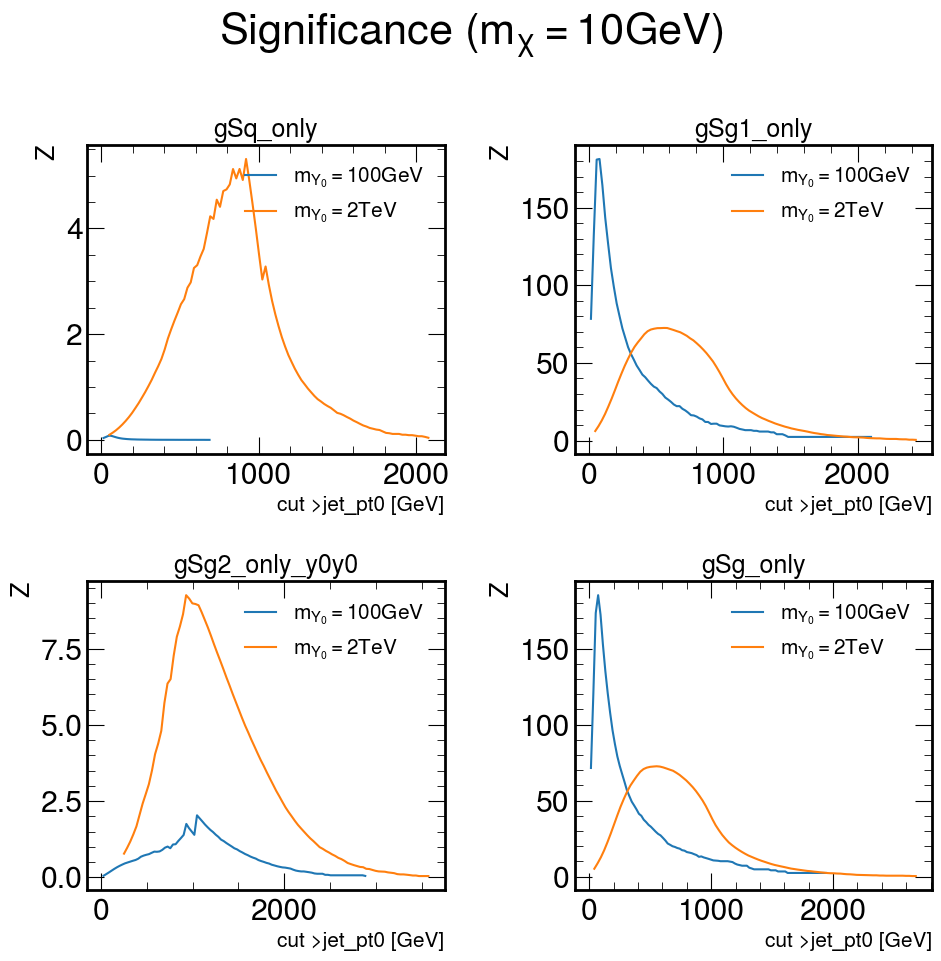

In [27]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

Acotamos el rango de busqueda

In [28]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt0', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']],
                                 set_lims=True, lims=(0,1500), size=500)

In [29]:
cuts = get_cuts(cases, Z, pt_values, "jet_pt0", "GeV", ["my0=100GeV", "my0=2TeV"], printResults=True)

case : gSq_only
	mass point: my0=100GeV
		max significance: 0.07905000045155579
		cut: jet_pt0 > 55.14GeV
	mass point: my0=2TeV
		max significance: 5.421611186777612
		cut: jet_pt0 > 913.62GeV
case : gSg1_only
	mass point: my0=100GeV
		max significance: 185.28083404309265
		cut: jet_pt0 > 66.643GeV
	mass point: my0=2TeV
		max significance: 72.63062815009988
		cut: jet_pt0 > 554.374GeV
case : gSg2_only_y0y0
	mass point: my0=100GeV
		max significance: 2.071602471934759
		cut: jet_pt0 > 1040.109GeV
	mass point: my0=2TeV
		max significance: 9.310101963277745
		cut: jet_pt0 > 912.466GeV
case : gSg_only
	mass point: my0=100GeV
		max significance: 185.4908635725172
		cut: jet_pt0 > 69.934GeV
	mass point: my0=2TeV
		max significance: 72.57602950111206
		cut: jet_pt0 > 543.849GeV


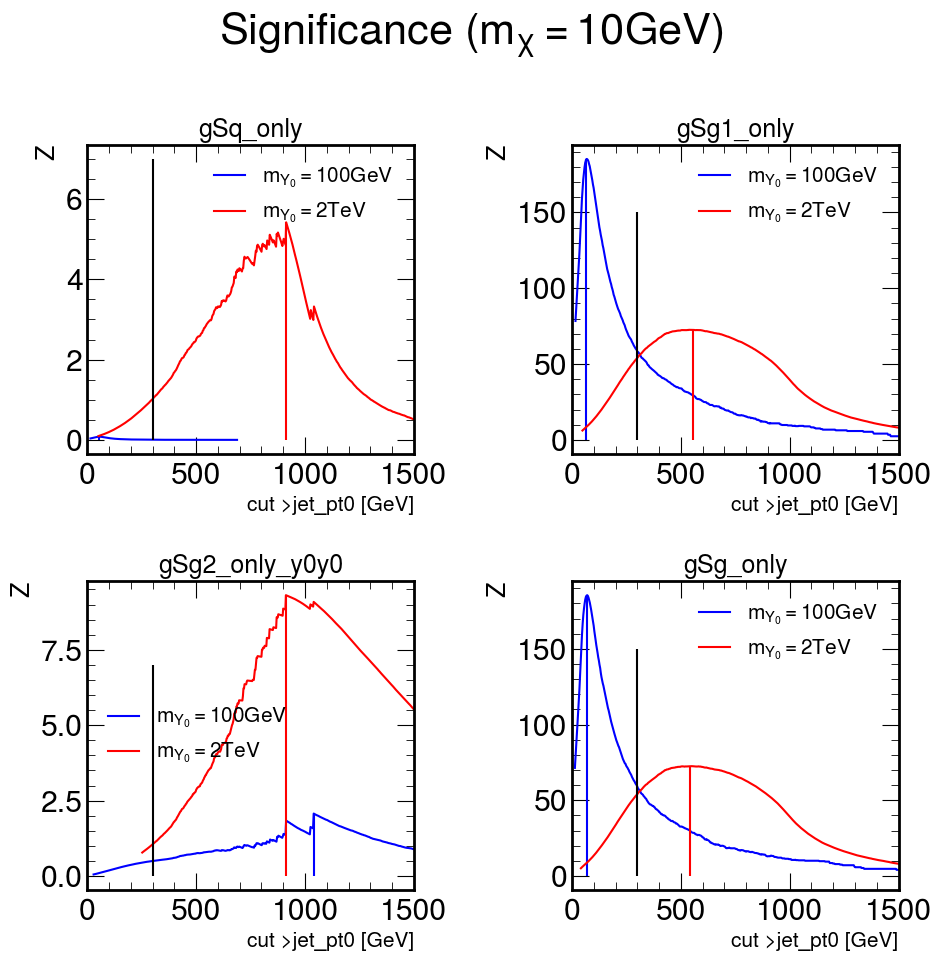

In [30]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i]),color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i]),color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i]),color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i]),color=colors[i])

ax[0,0].vlines(300, ymin=0, ymax=7, color='black')
ax[0,1].vlines(300, ymin=0, ymax=150, color='black')
ax[1,0].vlines(300, ymin=0, ymax=7, color='black')
ax[1,1].vlines(300, ymin=0, ymax=150, color='black')

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1500)

fig.tight_layout()
plt.show()

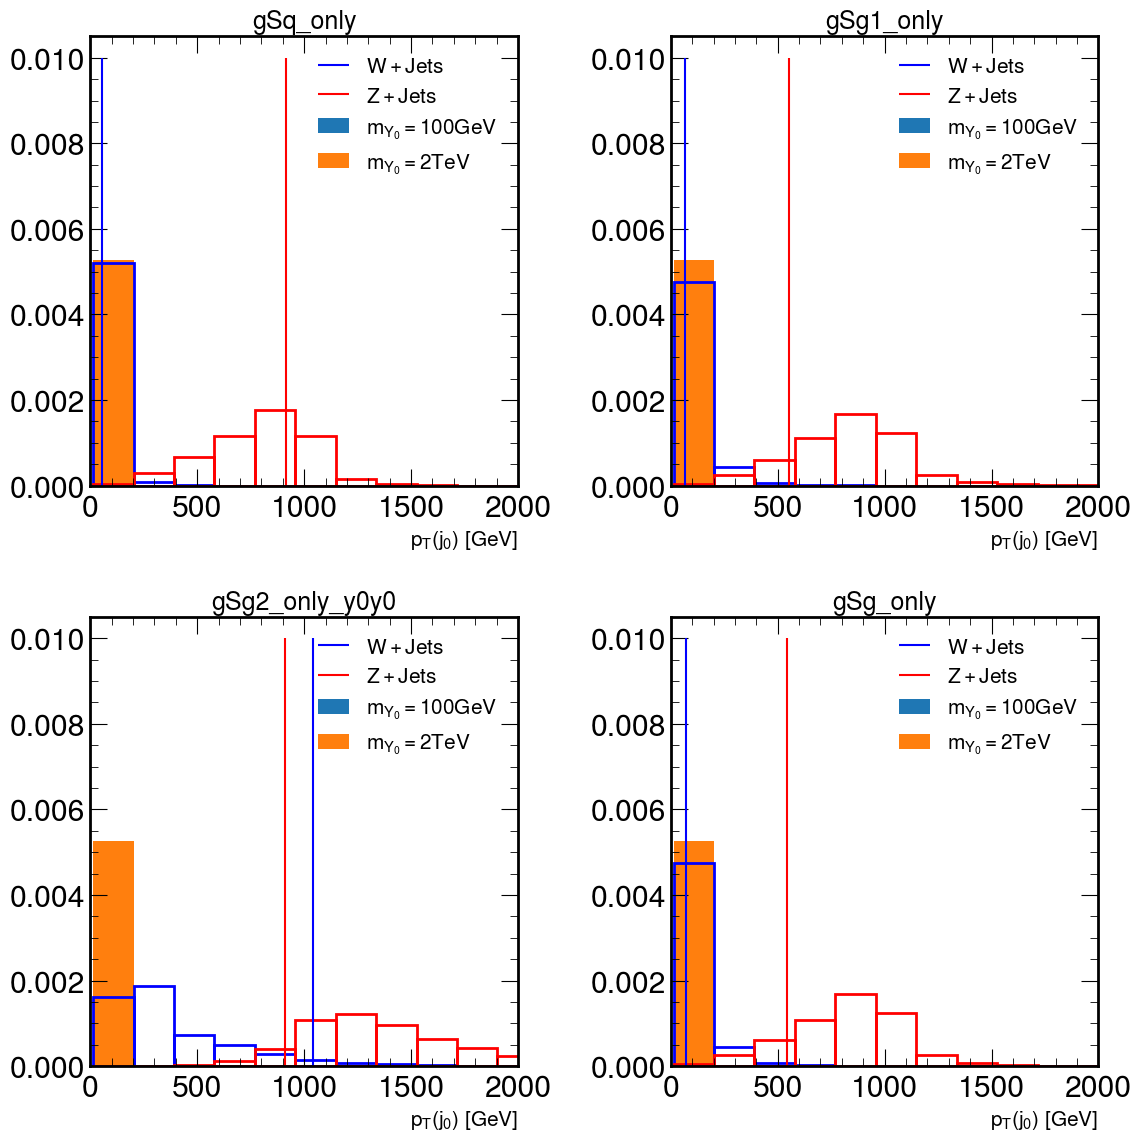

In [31]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'jet_pt0'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

maxValue = max([data[i][j][variable].max() for i in cases for j in range(2)])
minValue = min([data[i][j][variable].min() for i in cases for j in range(2)])

rango = np.linspace(minValue, maxValue, nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=0.01,color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$p_{T}{(j_{0})}$ [GeV]",fontsize=15)
        ax[i,j].set_xlim(0,2000)


fig.tight_layout()
plt.show()


Cut in 200GeV

In [32]:
for i in cases:
    for j in range(2):
        data[i][j] = data[i][j].query('jet_pt0 > 200')

data_WpJ = data_WpJ.query('jet_pt0 > 200')
data_ZpJ = data_ZpJ.query('jet_pt0 > 200')

In [33]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])

Número de Eventos para cada caso:
	Original
Modelos:  [[616, 62655], [3865, 59534], [29198, 51683], [3848, 59318]]
WpJets + ZpJets:  [2400, 2782]


### Cut in $p_{T}{(j_{1})}$

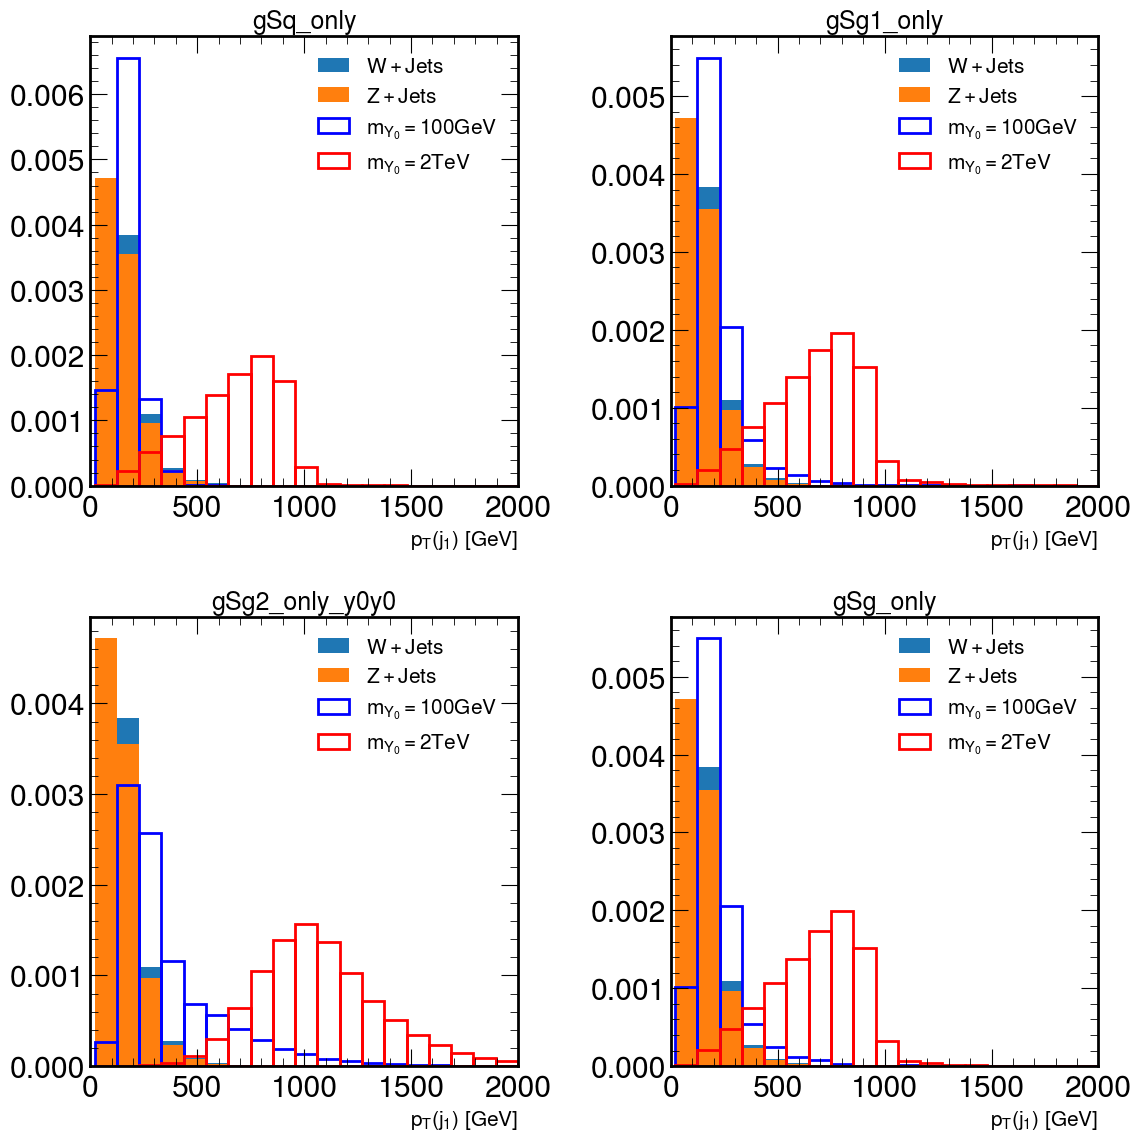

In [34]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'jet_pt1', r"$p_{T}{(j_{1})}$ [GeV]", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,2000))

In [35]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt1', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

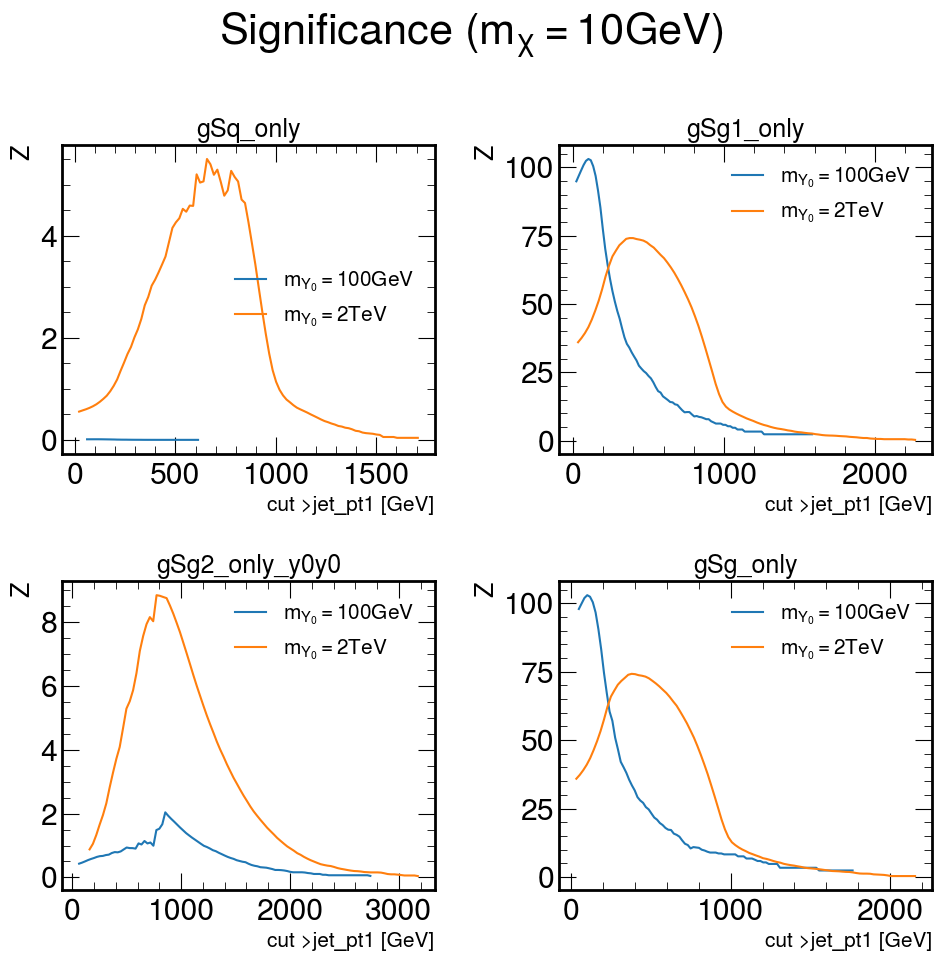

In [36]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt1 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

In [37]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt1', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']],
                                 set_lims=True, lims=(0,1000), size=500)

In [38]:
cuts = get_cuts(cases, Z, pt_values, "jet_pt1", "GeV", ["my0=100GeV", "my0=2TeV"], printResults=True)

case : gSq_only
	mass point: my0=100GeV
		max significance: 0.01187272328085633
		cut: jet_pt1 > 106.352GeV
	mass point: my0=2TeV
		max significance: 5.553607391752769
		cut: jet_pt1 > 652.455GeV
case : gSg1_only
	mass point: my0=100GeV
		max significance: 103.10085108418012
		cut: jet_pt1 > 102.661GeV
	mass point: my0=2TeV
		max significance: 74.3208317065936
		cut: jet_pt1 > 388.065GeV
case : gSg2_only_y0y0
	mass point: my0=100GeV
		max significance: 2.0860188078142494
		cut: jet_pt1 > 843.964GeV
	mass point: my0=2TeV
		max significance: 8.916260307813443
		cut: jet_pt1 > 812.733GeV
case : gSg_only
	mass point: my0=100GeV
		max significance: 102.85869077544923
		cut: jet_pt1 > 98.215GeV
	mass point: my0=2TeV
		max significance: 74.28445111516628
		cut: jet_pt1 > 384.427GeV


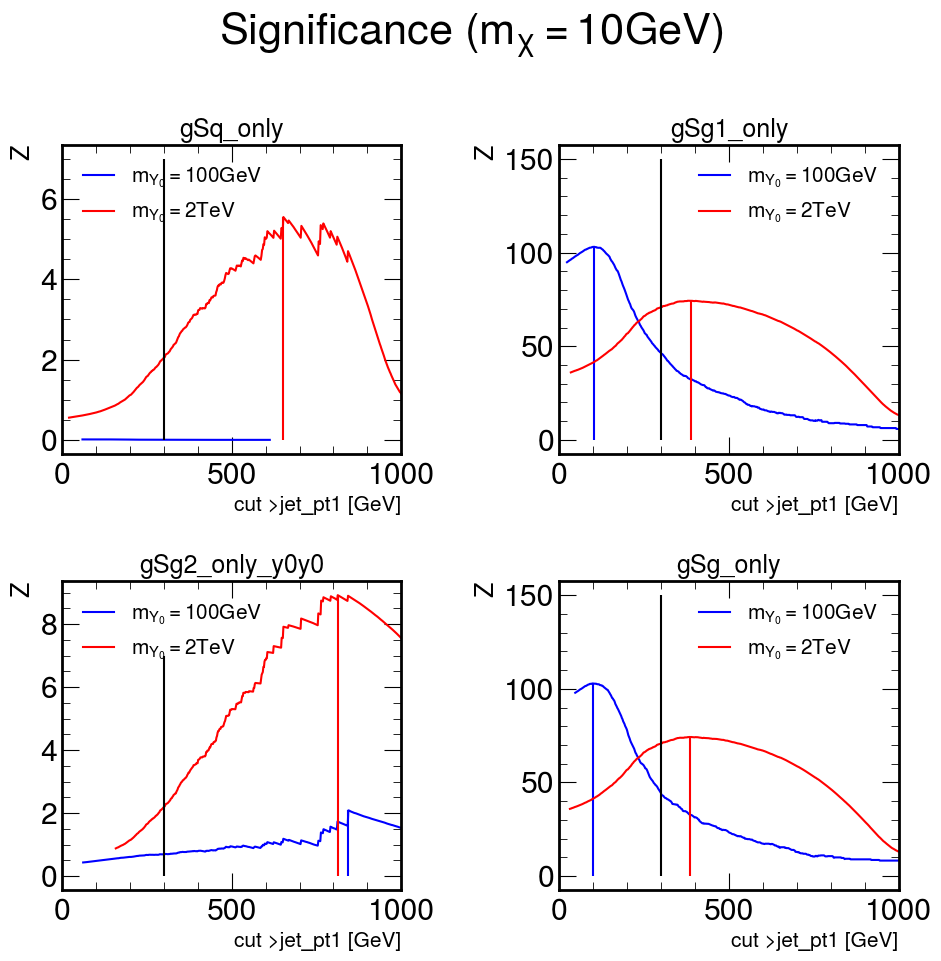

In [39]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i]),color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i]),color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i]),color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i]),color=colors[i])

ax[0,0].vlines(300, ymin=0, ymax=7, color='black')
ax[0,1].vlines(300, ymin=0, ymax=150, color='black')
ax[1,0].vlines(300, ymin=0, ymax=7, color='black')
ax[1,1].vlines(300, ymin=0, ymax=150, color='black')

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt1 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1000)

fig.tight_layout()
plt.show()

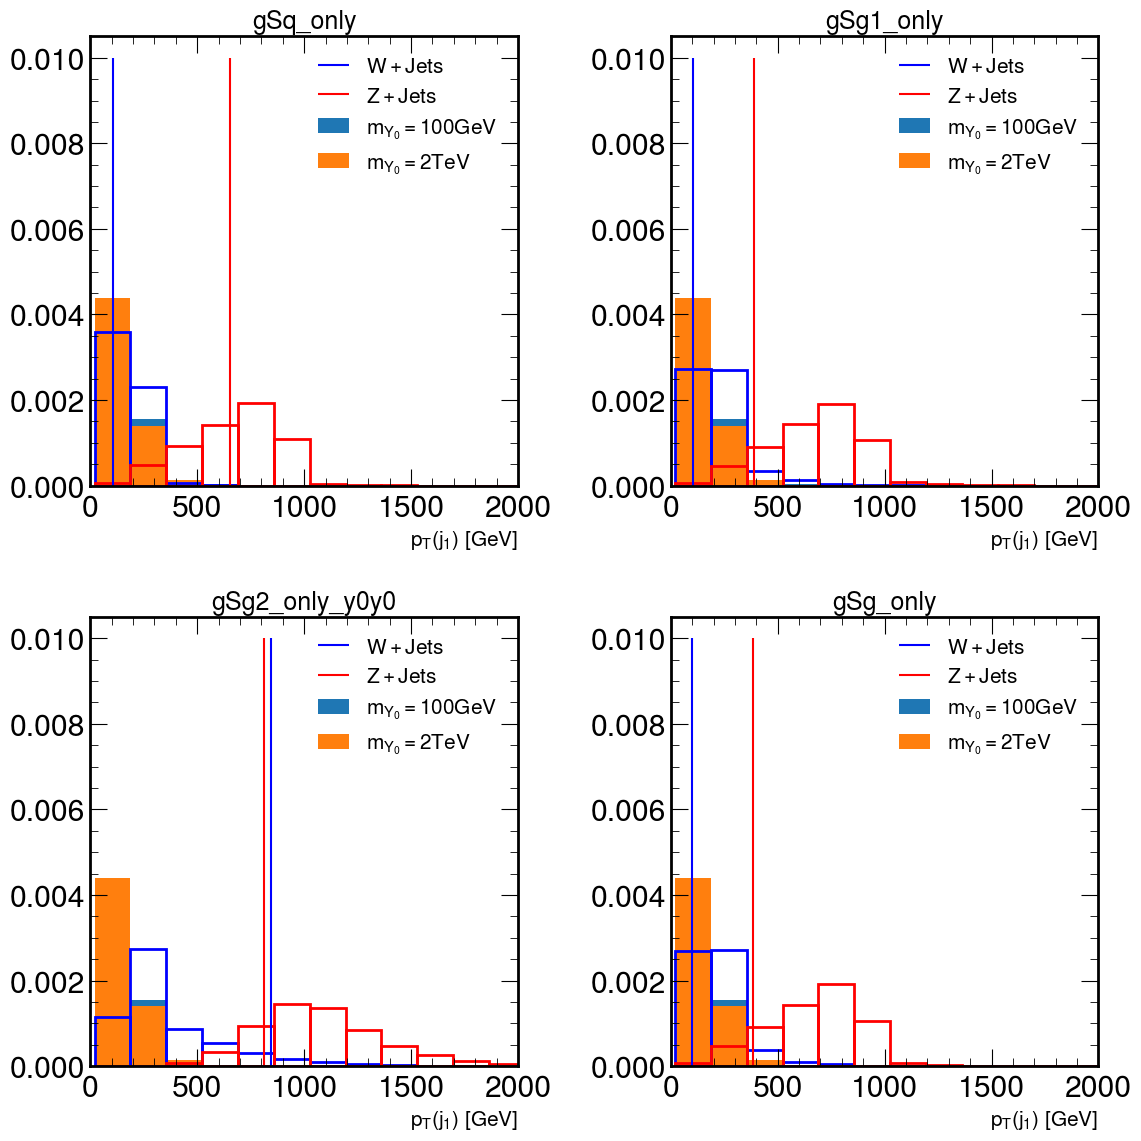

In [40]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'jet_pt1'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

maxValue = max([data[i][j][variable].max() for i in cases for j in range(2)])
minValue = min([data[i][j][variable].min() for i in cases for j in range(2)])

rango = np.linspace(minValue, maxValue, nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=0.01,color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$p_{T}{(j_{1})}$ [GeV]",fontsize=15)
        ax[i,j].set_xlim(0,2000)


fig.tight_layout()
plt.show()

Make cut in 300GeV

In [41]:
for i in cases:
    for j in range(2):
        data[i][j] = data[i][j].query('jet_pt1 > 300')

data_WpJ = data_WpJ.query('jet_pt1 > 300')
data_ZpJ = data_ZpJ.query('jet_pt1 > 300')

In [42]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])

Número de Eventos para cada caso:
	Original
Modelos:  [[26, 58929], [597, 56310], [12938, 51662], [555, 56019]]
WpJets + ZpJets:  [143, 128]


## Plot $p_{T}^{miss}$

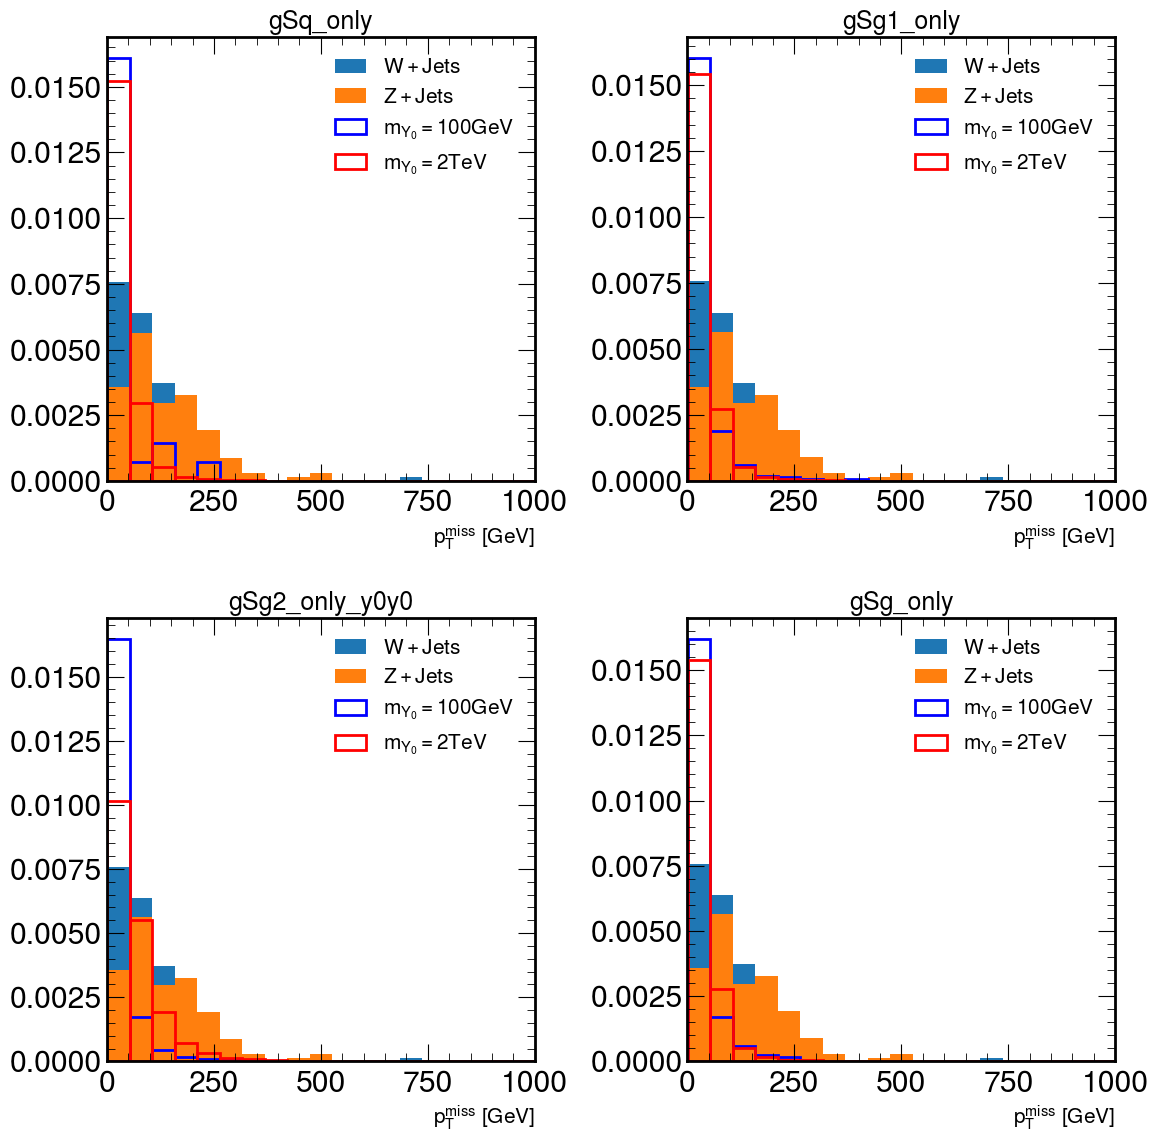

In [43]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'missinget_met', r"$p_{T}^{miss}$ [GeV]", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,1000))

#### VBF variables

$\eta(j_{0}) \cdot \eta(j_{1})$

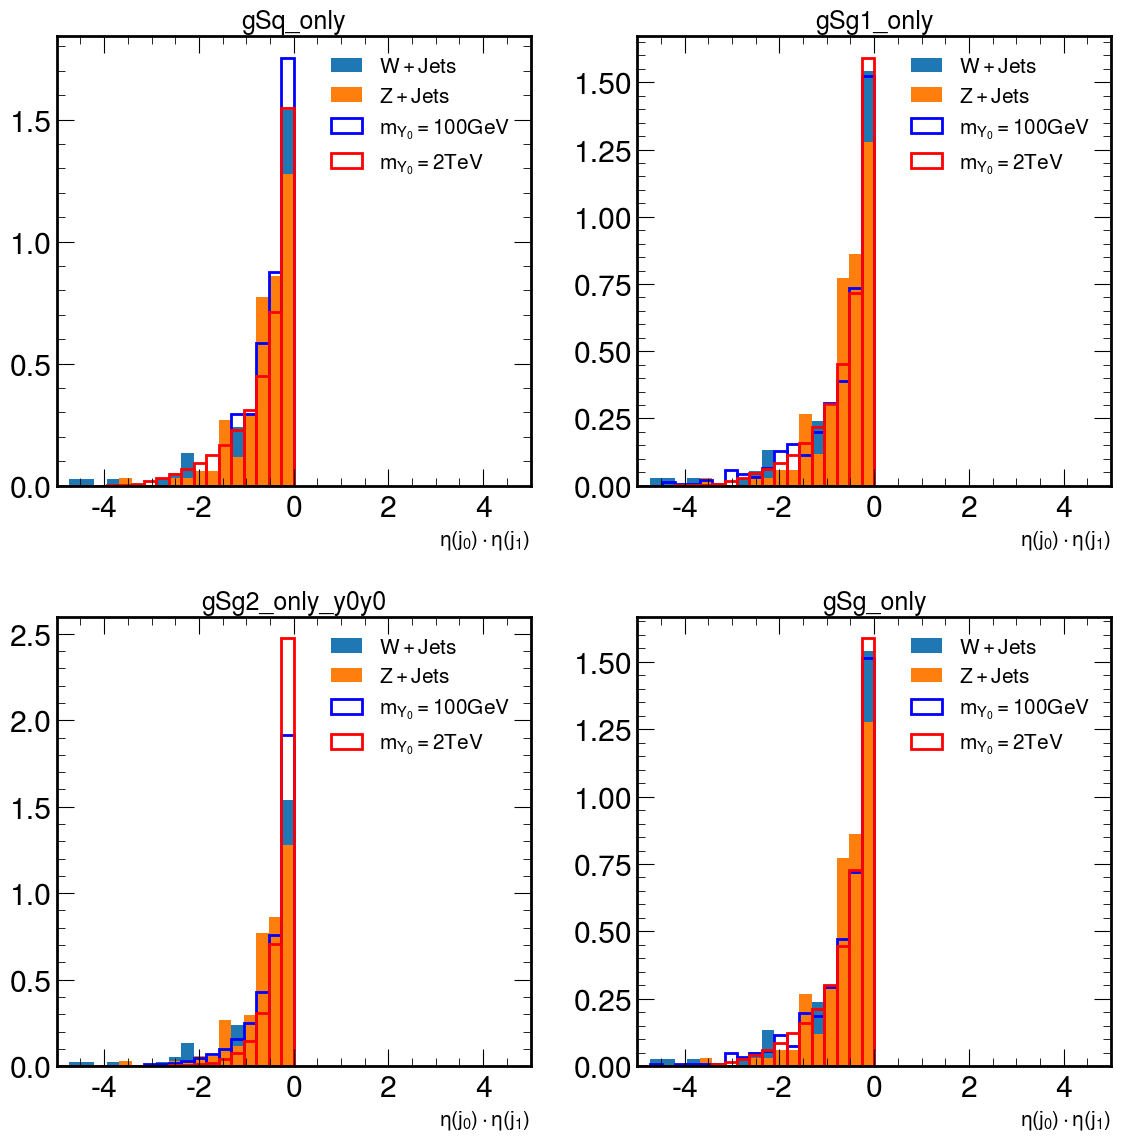

In [44]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Rapidity_prod', r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(-5,5))

In [45]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Rapidity_prod', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']], cond='<')

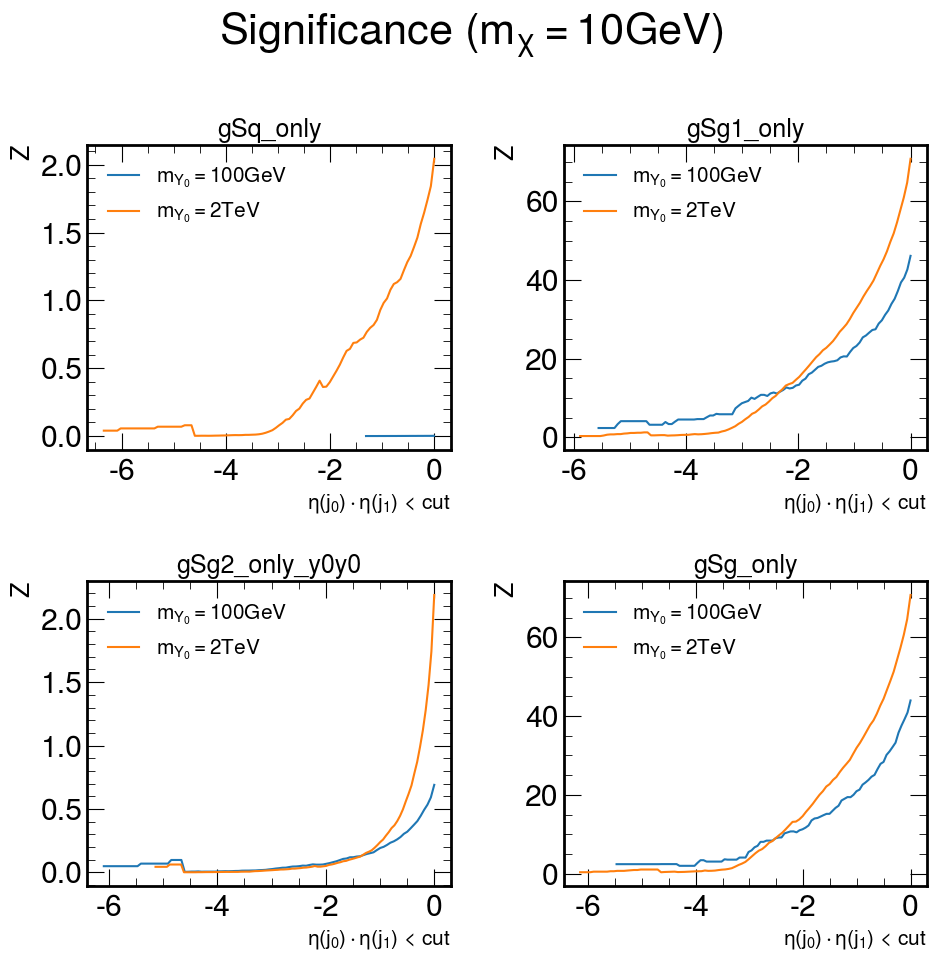

In [46]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$ < cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

### $\Delta\phi_{jj}$

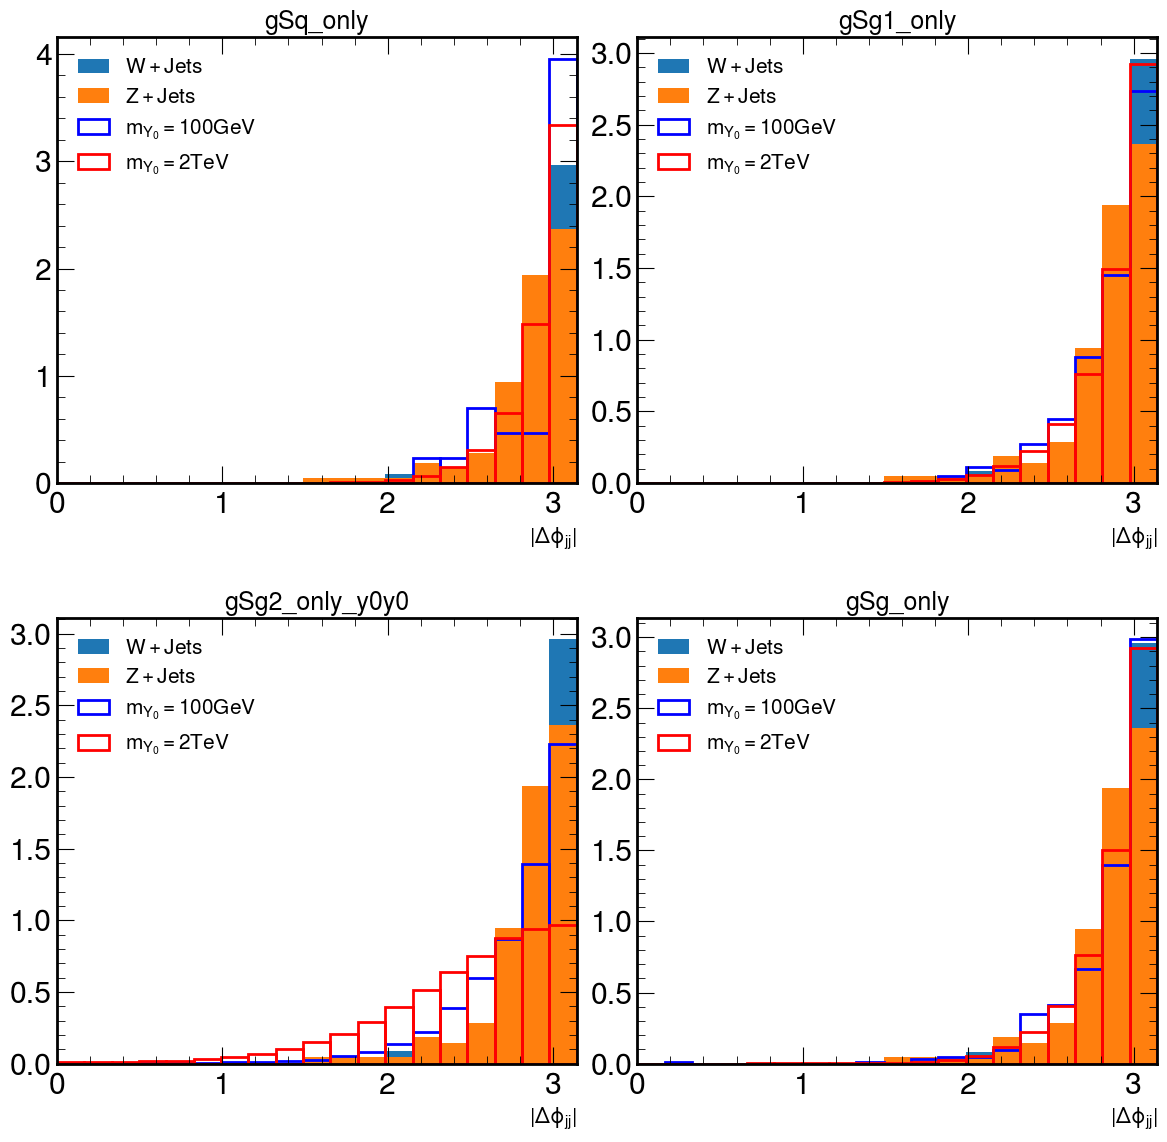

In [47]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Delta_phi', r"$|\Delta\phi_{jj}|$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,np.pi))

In [48]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Delta_phi', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

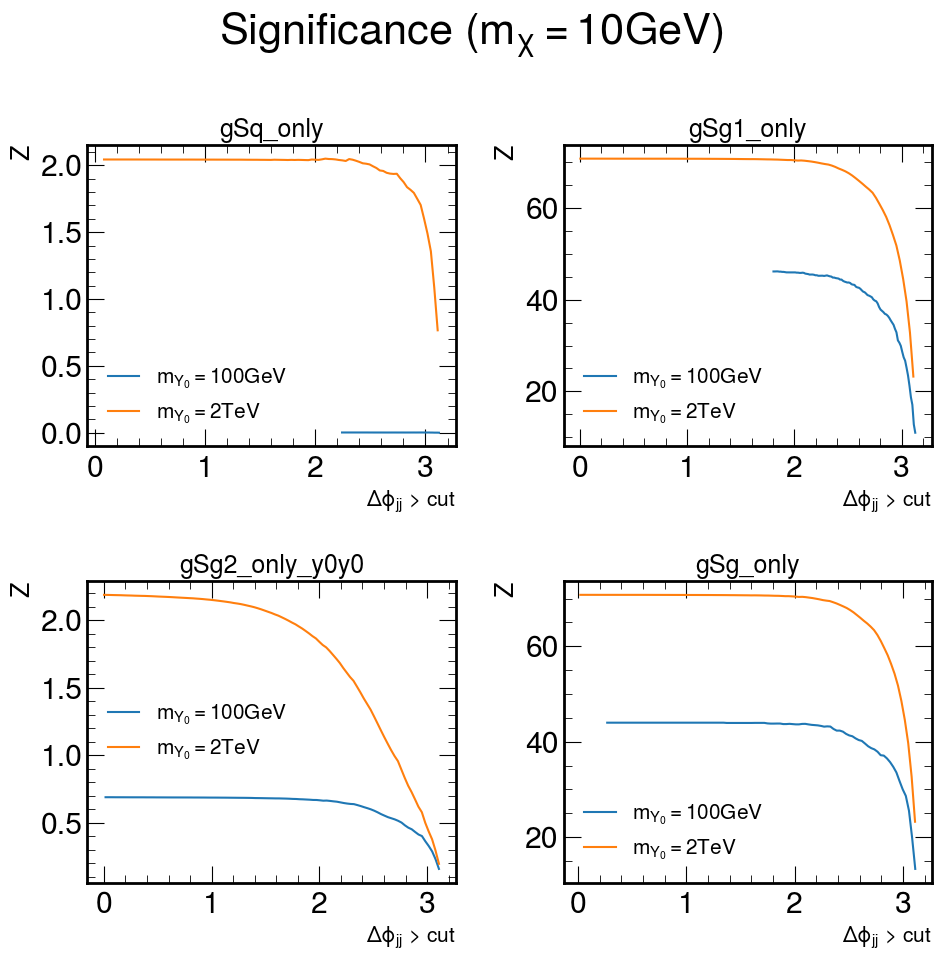

In [49]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\phi_{jj}$ > cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

### $m_{jj}$

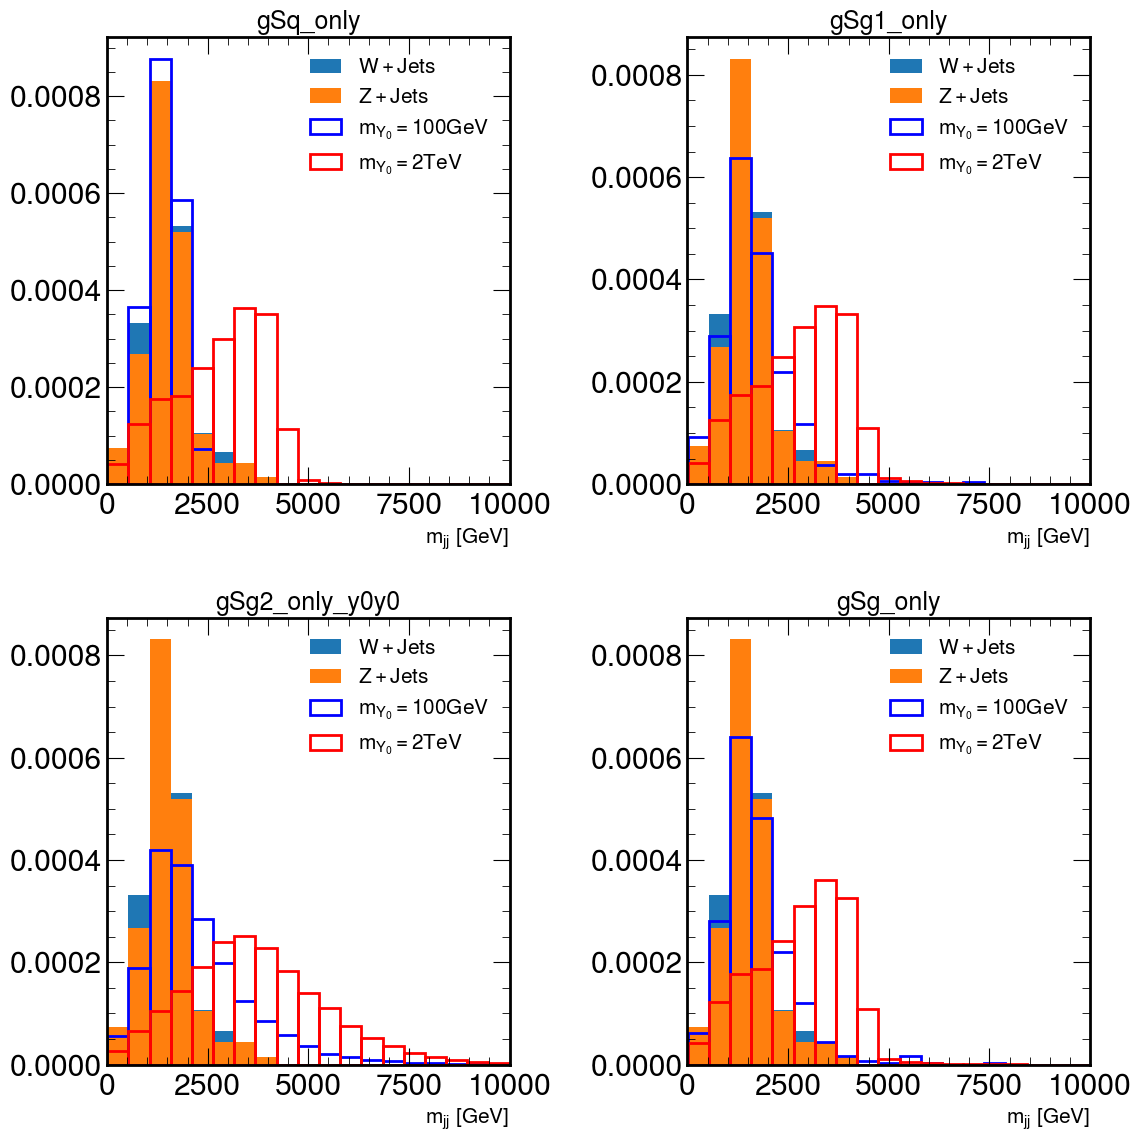

In [50]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Inv_mass', r"$m_{jj}$ [GeV]", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,10000))

In [51]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Inv_mass', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

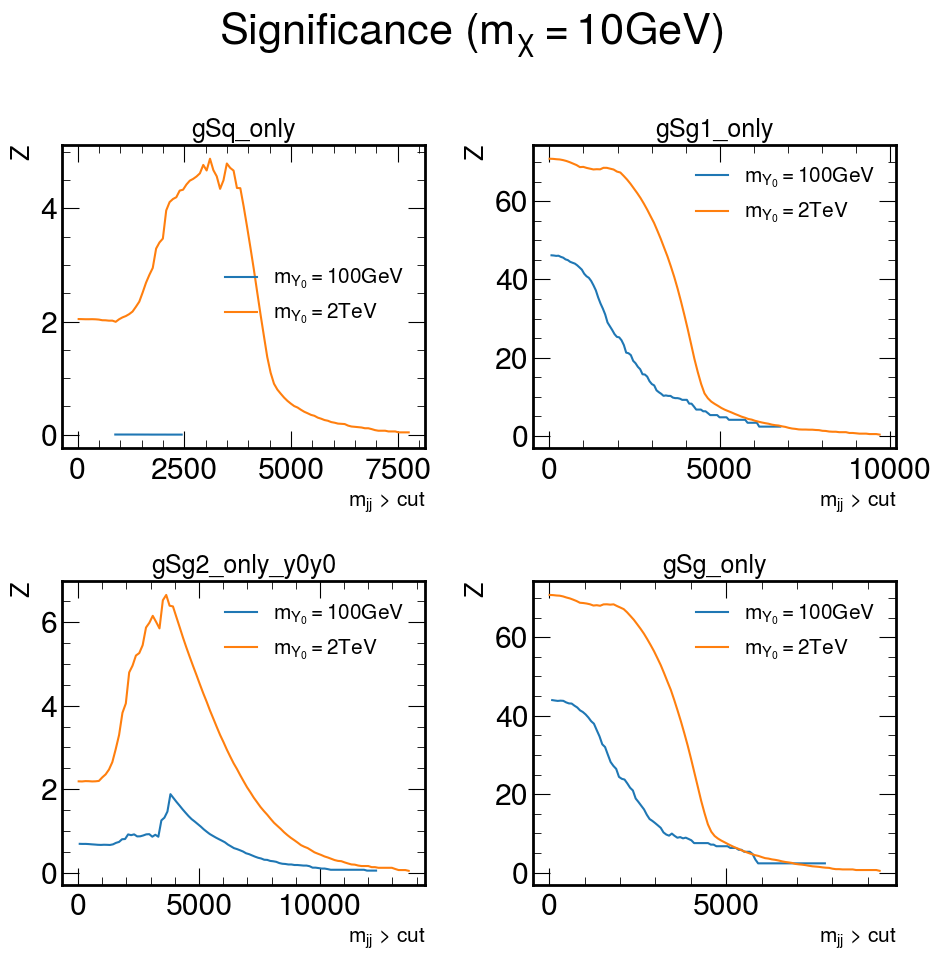

In [52]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$m_{jj}$ > cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

### $\Delta \eta_{jj}$

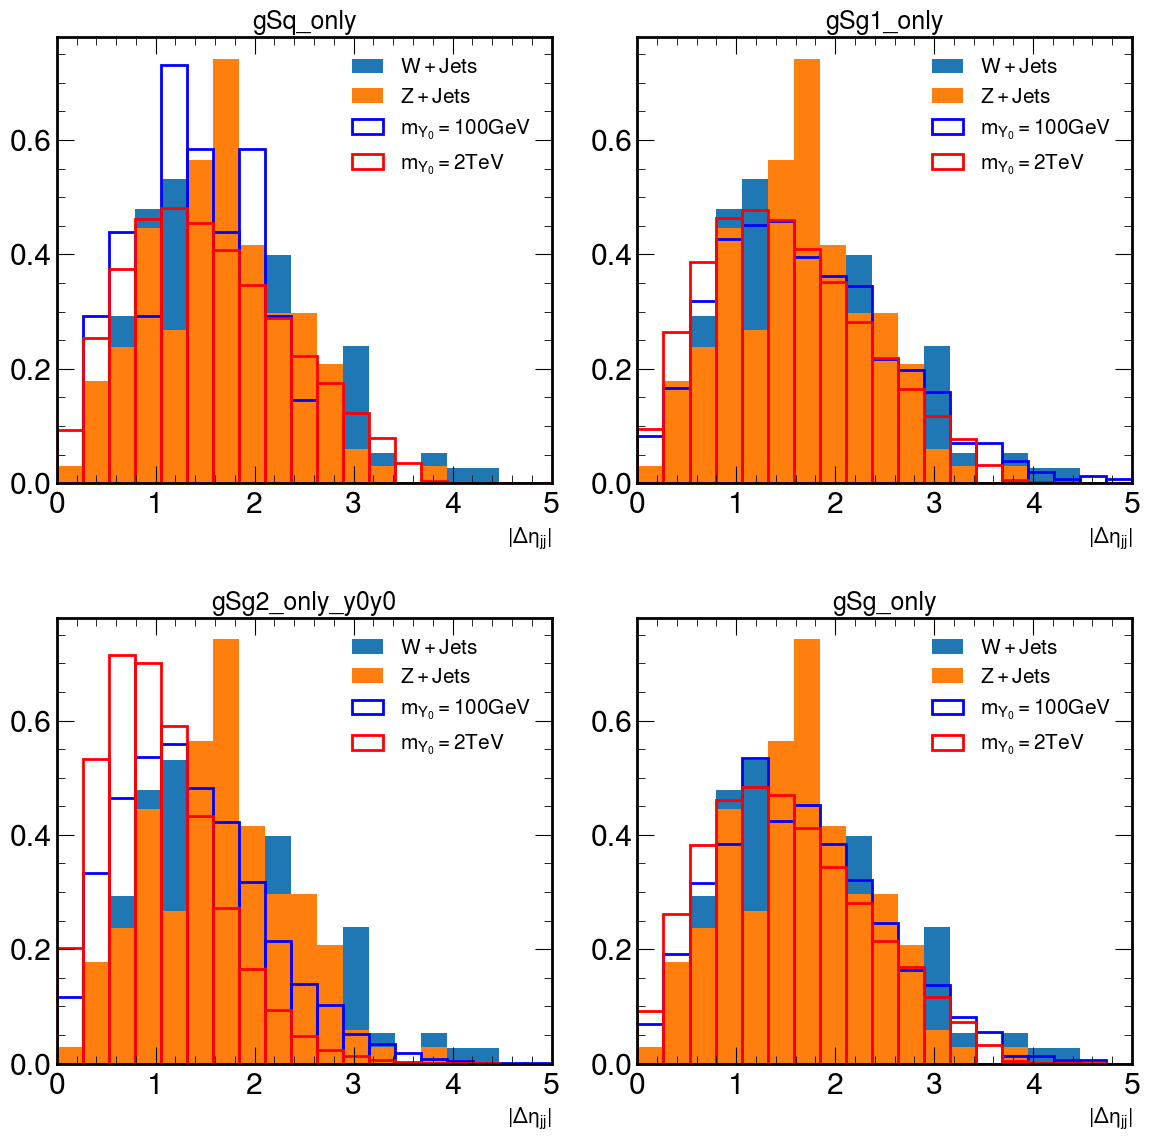

In [53]:
plot_4cases([data_WpJ, data_ZpJ], data, cases, 'Delta_rapidity', r"$|\Delta\eta_{jj}|$", [r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"], xlim=(0,5))

In [54]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Delta_rapidity', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

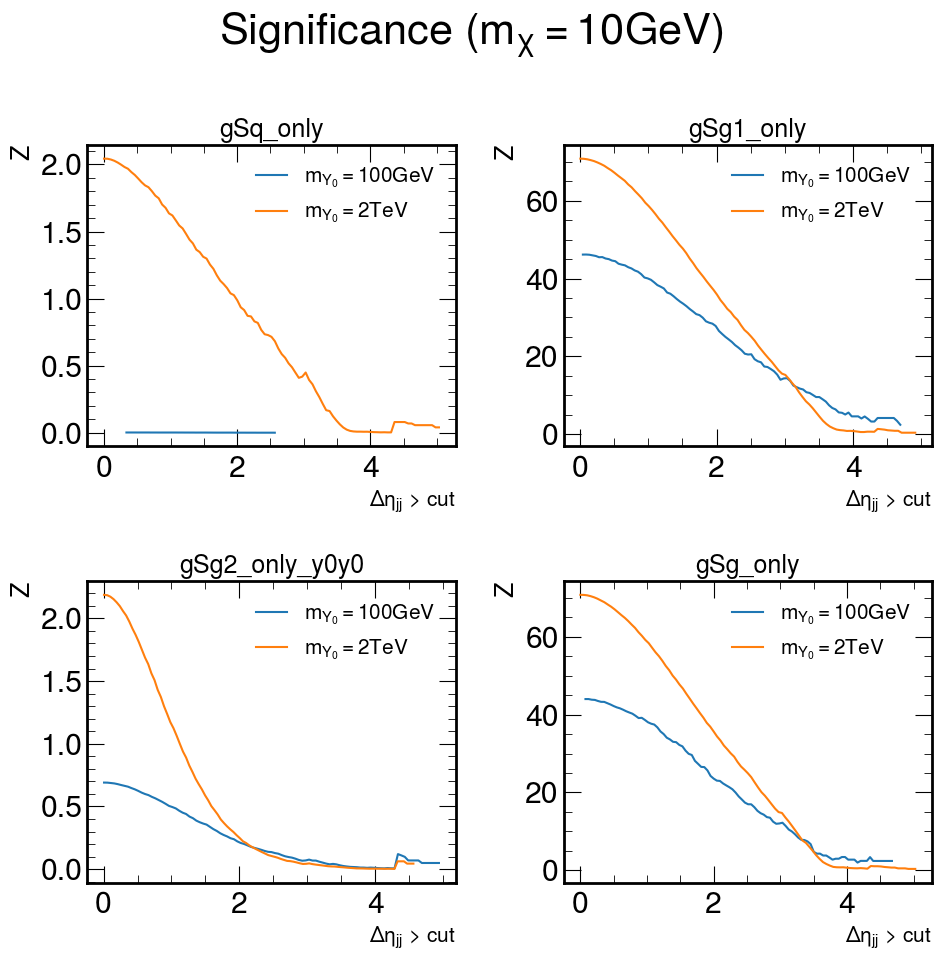

In [55]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\eta_{jj}$ > cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()